In [8]:
import sys
import os

sys.path.append("H:/Mon Drive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation")

import function

from function import plt,Path_manager_local,utils,utils_2,Split_AnnData
from  function.Path_manager_local import *
from  function.utils import *
from  function.utils_2 import *
from  function.Split_AnnData import *

import anndata

import os, sys , json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data, DataLoader
import scanpy as sc
from torchinfo import summary

from model_n_loss.Vae_v2 import *
from model_n_loss.Vae_v1 import *
from model_n_loss.loss import *

import torchsummary
import squidpy as sq
from scipy.stats import pearsonr
from function import utils
# from importlib import reload
from function.utils import *


seed = 42
torch.manual_seed(seed)

## Run in drive 

In [1]:

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/
%run Path_manager_GoogleColab.py

pm = PathManager()

import os
import importlib
import scvi
from scvi.hub import HubModel


# importlib.reload(Path_manager_GoogleColab)

os.getcwd()



Mounted at /content/drive
/content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation


'/content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation'

In [3]:
import torch
print(f"GPU available: {torch.cuda.is_available()}")
print(f"GPU name: {torch.cuda.get_device_name(0)}")

GPU available: True
GPU name: NVIDIA A100-SXM4-40GB


In [5]:
# Load TMA data (Scanpy AnnData objects)
tma_data = pm.load_tma_objects()

tma_data_subset_inference = tma_data[0:1].copy()
tma_data = tma_data[1:].copy()
print(f"Training dataset: {len(tma_data)}")
print(f"Inference dataset: {len(tma_data_subset_inference)}")

# Load EcoFoundation objects
eco_data = pm.load_eco_objects()

NameError: name 'pm' is not defined

In [3]:
# Load TMA data (Scanpy AnnData objects)
tma_data = get_tma_objects()
# By default, it looks for "./data/Processed/Processed_new_TMA_*.h5ad"

# Load EcoFoundation objects
eco_data = get_eco_objects()

Loaded: Processed_new_TMA_1_1.h5ad
Loaded: Processed_new_TMA_1_10.h5ad
Loaded: Processed_new_TMA_1_11.h5ad
Loaded: Processed_new_TMA_1_12.h5ad
Loaded: Processed_new_TMA_1_13.h5ad
Loaded: Processed_new_TMA_1_14.h5ad
Loaded: Processed_new_TMA_1_15.h5ad
Loaded: Processed_new_TMA_1_16.h5ad
Loaded: Processed_new_TMA_1_17.h5ad
Loaded: Processed_new_TMA_1_18.h5ad
Loaded: Processed_new_TMA_1_19.h5ad
Loaded: Processed_new_TMA_1_2.h5ad
Loaded: Processed_new_TMA_1_20.h5ad
Loaded: Processed_new_TMA_1_21.h5ad
Loaded: Processed_new_TMA_1_22.h5ad
Loaded: Processed_new_TMA_1_23.h5ad
Loaded: Processed_new_TMA_1_24.h5ad
Loaded: Processed_new_TMA_1_25.h5ad
Loaded: Processed_new_TMA_1_26.h5ad
Loaded: Processed_new_TMA_1_27.h5ad
Loaded: Processed_new_TMA_1_28.h5ad
Loaded: Processed_new_TMA_1_29.h5ad
Loaded: Processed_new_TMA_1_3.h5ad
Loaded: Processed_new_TMA_1_30.h5ad
Loaded: Processed_new_TMA_1_31.h5ad
Loaded: Processed_new_TMA_1_32.h5ad
Loaded: Processed_new_TMA_1_33.h5ad
Loaded: Processed_new_TMA_1_34.

In [104]:
tma_data

[AnnData object with n_obs × n_vars = 7616 × 500
     obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'ident', 'celltype', 'leiden'
     var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
     uns: 'Graph_DF', 'barcode_mapping', 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'spatial_neighbors', 'umap'
     obsm: 'X_pca', 'X_umap', 'pca', 'spatial', 'umap'
     varm: 'PCs'
     layers: 'counts', 'norm'
     obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances',
 AnnData object with n_obs × n_vars = 10323 × 500
     obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'ident', 'celltype', 'leiden'
     var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
     uns: 'Graph_DF', 'barcode_mapping', 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'spatial_neighbors', 'umap'
     obsm: 'X_pca', 'X_umap', 'pca', 'spatial', 'umap'
     varm: 'PCs'
     layers: 'counts', 'norm'
     obsp: 'connectivities', 'distances', 'spatial_connectivities'

In [ ]:
# Merge all AnnData objects (assuming each has .layers["counts"] as raw counts)
batch_names = [f"batch{i}" for i in range(len(tma_data))]
combined_adata = ad.concat(
    tma_data, 
    axis=0, 
    join='inner', 
    label="batch", 
    keys=batch_names
)


temp_adata = combined_adata.copy()

# Normalize & log-transform
X_concat_norm = sc.pp.log1p(X_concat_norm)


TypeError: 'NoneType' object is not subscriptable

In [106]:
import scanpy as sc
import anndata as ad
import numpy as np

# ------------------------------------------------------------------------------
# 1. Read & Merge AnnData Objects
# ------------------------------------------------------------------------------
# Suppose you have a list of pre-loaded AnnData objects or file paths
# For demonstration, let's say we have a list of AnnData objects in 'adata_list'

# Example: If you had file paths, you might do:
# adata_list = [sc.read(f"sample{i}.h5ad") for i in range(1, 74)]

# But here let's assume adata_list is already in memory.
# We'll define batch names to keep track of each dataset's origin.
batch_names = [f"batch_{i}" for i in range(len(tma_data))]

# Merge all AnnData objects into a single combined AnnData
combined_adata = ad.concat(
    tma_data,
    axis=0,
    join='inner',           # Only keep genes present in all
    label='batch',          # Name of new obs column that stores batch info
    keys=batch_names        # Values of that obs column
)

print("Merged AnnData shape:", combined_adata.shape)
# e.g., Merged AnnData shape: (N_cells, M_genes)

# ------------------------------------------------------------------------------
# 2. Store or confirm where the raw counts live
# ------------------------------------------------------------------------------
# If your adata_list objects had raw counts in .X or .layers["counts"],
# you need to confirm that after merging. Let's assume the merged .X
# is raw counts. If not, we can do:
# combined_adata.X = combined_adata.layers["counts"]

# If you want to keep a copy of raw counts in a layer, do:
combined_adata.layers["counts"] = combined_adata.X.copy()

# ------------------------------------------------------------------------------
# 3. Normalize Using inplace=False
# ------------------------------------------------------------------------------
# We'll normalize total counts to 1e4 (CP10k normalization) without
# modifying combined_adata.X in place.
norm_result = sc.pp.normalize_total(combined_adata, 
                                    target_sum=1e4,
                                    inplace=False)
# norm_result is a dict with keys: ["X", "norm_factor"]

X_norm = norm_result["X"]  # This is the normalized expression matrix (sparse or dense)

# ------------------------------------------------------------------------------
# 4. Log1p Transform the Normalized Data
# ------------------------------------------------------------------------------
# We'll manually apply log1p, since sc.pp.log1p() usually modifies .X
# in place. We want to keep everything in a separate object, so let's
# make a new AnnData for the normalized + log1p data:
norm_log_adata = combined_adata.copy()
# Now overwrite .X with the normalized counts from step 3
norm_log_adata.X = X_norm

# We apply np.log1p to the .X matrix
# (If X_norm is a sparse matrix, np.log1p(X_norm) is a bit tricky.
#  Alternatively, you can do sc.pp.log1p(norm_log_adata) if you want
#  to rely on scanpy's built-in handling of sparse arrays.)
sc.pp.log1p(norm_log_adata)

# Optionally store the normalized+logged data in a layer
norm_log_adata.layers["norm_log"] = norm_log_adata.X.copy()

# ------------------------------------------------------------------------------
# 5. PCA
# ------------------------------------------------------------------------------
# We can now run PCA on norm_log_adata, which has the normalized, log-transformed data in .X
sc.tl.pca(norm_log_adata, n_comps=50)
print("PCA shape:", norm_log_adata.obsm["X_pca"].shape)

# ------------------------------------------------------------------------------
# 6. Neighbors & UMAP
# ------------------------------------------------------------------------------
# We'll build a neighborhood graph using the first 50 PCs
sc.pp.neighbors(norm_log_adata, n_neighbors=10, n_pcs=10)

# Compute UMAP
sc.tl.umap(norm_log_adata)

# ------------------------------------------------------------------------------
# 7. Clustering (Leiden)
# ------------------------------------------------------------------------------
sc.tl.leiden(norm_log_adata, resolution=1.0)
# Additional clustering algorithms, e.g., louvain, can also be run.

# ------------------------------------------------------------------------------
# 8. Visualization
# ------------------------------------------------------------------------------
# Plot UMAP colored by batch (from 'combined_adata'), and by leiden cluster
sc.pl.umap(norm_log_adata, color=["batch", "leiden"])


Merged AnnData shape: (463844, 500)
PCA shape: (463844, 50)


KeyboardInterrupt: 

In [ ]:
temp_adata = combined_adata.copy()
combined_adata.X = combined_adata.layers["counts"]
norm_result = sc.pp.normalize_total(temp_adata, target_sum=1e4, inplace=False)
temp_adata.X = norm_result["X"]
sc.pp.log1p(temp_adata)


KeyError: 'X'

In [ ]:



# Optionally store normalized data in .layers['norm']
combined_adata.layers['norm'] = combined_adata.X.copy()

# Then do PCA, neighbors, UMAP, clustering, etc.
sc.pp.pca(combined_adata)
sc.pp.neighbors(combined_adata)
sc.tl.umap(combined_adata)
sc.tl.leiden(combined_adata)


In [96]:
combined_adata.obs.batch=='batch0'

TMA_1_1_3047593800130100001     True
TMA_1_1_3047593800130100002     True
TMA_1_1_3047593800130100003     True
TMA_1_1_3047593800130100004     True
TMA_1_1_3047593800130100006     True
                               ...  
TMA_2_9_3061545002710200018    False
TMA_2_9_3061545002710200044    False
TMA_2_9_3061545002710200053    False
TMA_2_9_3061545002710200068    False
TMA_2_9_3061545002710200163    False
Name: batch, Length: 463844, dtype: bool

In [ ]:

sc.pp.normalize_total(combined_adata, target_sum=1e4)  
sc.pp.log1p(combined_adata)     

combined_adata.X = combined_adata.layers['norm'] 

sc.pp.pca(combined_adata)

sc.pp.neighbors(combined_adata,n_neighbors=10, n_pcs=10)
sc.tl.umap(combined_adata)

sc.tl.leiden(combined_adata)



  



In [ ]:


# 5. Scale the data (zero-mean, unit variance)
#s


print("Step4/6: PCA")
sc.pp.pca(adata)

print("Step5/6: NN-Anaysis")
sc.pp.neighbors(adata,n_neighbors=10, n_pcs=10)
sc.tl.umap(adata)

print("Step6/6: Cluster")
sc.tl.leiden(adata)













In [ ]:
# Normalize each cell by total counts and multiply by a target sum (e.g., 1e4), then log-transform the data
sc.pp.normalize_total(combined, target_sum=1e4)  # Normalize total counts per cell to 1e4 (CP10k normalization)&#8203;:contentReference[oaicite:1]{index=1}
sc.pp.log1p(combined)                            # Log-transform the data (natural log of 1 + counts)

# Scale the data to unit variance and zero mean (important for PCA)
sc.pp.scale(combined)  # By default, this will zero-center and unit-scale each gene's expression

# Perform PCA on the normalized and scaled data
sc.tl.pca(combined, n_comps=50, svd_solver='arpack')  # Compute first 50 principal components
print(combined.obsm['X_pca'].shape)  # (n_cells, 50) check PCA result

# Compute the neighborhood graph using PCA coordinates
sc.pp.neighbors(combined, n_pcs=50, n_neighbors=15)  # Use PCA results, default 15 neighbors

# Compute UMAP embedding of the neighbor graph
sc.tl.umap(combined, min_dist=0.5)  # min_dist is a UMAP parameter; adjust for tighter/looser clusters if needed

# Plot UMAP, coloring points by batch to inspect batch effects
sc.pl.umap(combined, color='batch', title="UMAP colored by batch")  # Color by the 'batch' column in obs&#8203;:contentReference[oaicite:3]{index=3}



<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10161598 stored elements and shape (463844, 500)>

In [ ]:

# re normalize combined adata 

def RunPreprocessing(adata):
  
  print("step2/6: Store raw counts")
  if 'counts' not in adata.layers:
    adata.layers['counts'] = adata.X.copy()
  else : raise ValueError("Invalid AnnData object") 
         
  print("Step3/6: LogNorm")
  sc.pp.normalize_total(adata, inplace=True)
  sc.pp.log1p(adata)
  adata.layers['norm'] = adata.X.copy()

  print("Step4/6: PCA")
  sc.pp.pca(adata)
  
  print("Step5/6: NN-Anaysis")
  sc.pp.neighbors(adata,n_neighbors=10, n_pcs=10)
  sc.tl.umap(adata)
  
  print("Step6/6: Cluster")
  sc.tl.leiden(adata)
  
  return(adata)


# 2. Preprocessing: normalize & log-transform
sc.pp.normalize_total(combined, target_sum=1e4)
sc.pp.log1p(combined)


# 4. Subset the data to only HVGs (optional, but common)
combined = combined[:, combined.var['highly_variable']]

# 5. Scale the data (zero-mean, unit variance)
sc.pp.scale(combined)

# 6. PCA
sc.tl.pca(combined, n_comps=50, svd_solver='arpack')

# 7. Neighbors & UMAP
sc.pp.neighbors(combined, n_neighbors=15, n_pcs=50)
sc.tl.umap(combined)

# 8. Plot UMAP colored by batch
sc.pl.umap(combined, color='batch', title="UMAP colored by batch")



In [25]:
concatenate_adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,ident,celltype,leiden,batch
TMA_1_1_3047593800130100001,SeuratProject,29.0,6,SeuratProject,NPC-like neural,1,0
TMA_1_1_3047593800130100002,SeuratProject,36.0,10,SeuratProject,Plasma B,12,0
TMA_1_1_3047593800130100003,SeuratProject,55.0,28,SeuratProject,MES-like hypoxia/MHC,12,0
TMA_1_1_3047593800130100004,SeuratProject,44.0,24,SeuratProject,TAM-MG prolif,5,0
TMA_1_1_3047593800130100006,SeuratProject,36.0,18,SeuratProject,NPC-like Prolif,1,0
...,...,...,...,...,...,...,...
TMA_2_9_3061545002710200018,SeuratProject,22.0,12,SeuratProject,TAM-MG pro-infl II,25,73
TMA_2_9_3061545002710200044,SeuratProject,45.0,29,SeuratProject,NK,2,73
TMA_2_9_3061545002710200053,SeuratProject,49.0,34,SeuratProject,L2/3 IT,2,73
TMA_2_9_3061545002710200068,SeuratProject,41.0,35,SeuratProject,CD4 rest,6,73


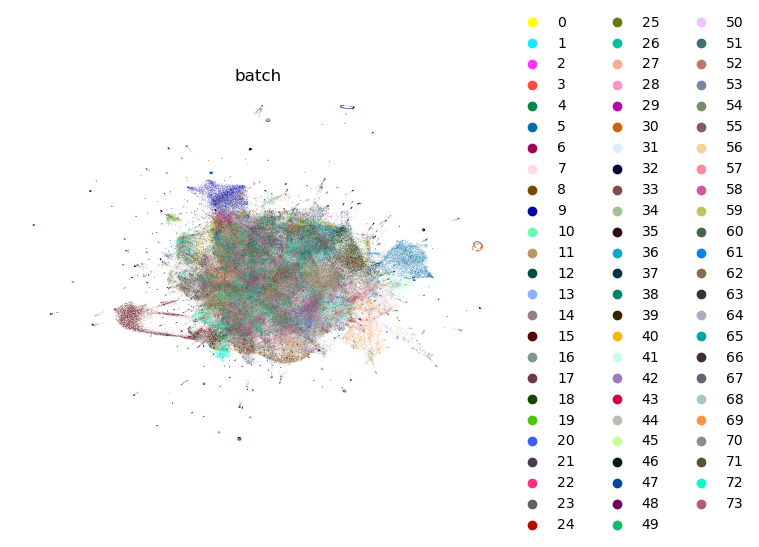

In [28]:
concatenate_adata
sc.pl.umap(
    concatenate_adata,
    color=["batch"],
    frameon=False,
)

In [119]:
import os
import json
import torch
from tqdm import tqdm

def train_vae(model, train_dataloader, val_dataloader, epochs, optimizer, model_save_dir,
              device, kl_weight=1.0, clip_value=1.0, early_stopping_patience=20, min_delta=0,learning_rate_patience= 10):
    # Set device and move model
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)

    # Initialize early stopping and best validation loss
    early_stopping = EarlyStopping(patience=early_stopping_patience, min_delta=min_delta)
    best_val_loss = float('inf')

    # Create an adaptive learning rate scheduler
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.55, patience=learning_rate_patience)

    # Dictionary to store training history
    history = {
        'train_loss': [], 'val_loss': [],
        'train_zinb': [], 'val_zinb': [],
        'train_kl': [], 'val_kl': [],
        'lr': [], 'best_loss': float('inf')
    }

    os.makedirs(model_save_dir, exist_ok=True)
    best_model_path = os.path.join(model_save_dir, 'best_model.pth')

    for epoch in tqdm(range(epochs)):
        # ---------------------------
        # Training Phase
        # ---------------------------
        model.train()
        total_train_loss = 0.0
        train_kld = 0.0
        train_zinb = 0.0

        for x in train_dataloader:
            x = x.to(device)
            mean, logvar, scale, dropout, theta = model(x)

            # KLD Regularization
            kld = -0.5 * torch.sum(1 + logvar - mean.pow(2) - logvar.exp(), dim=1).mean()

            # ZINB Reconstruction Loss
            zinb_recon_loss = zinb_loss(x, scale, dropout, theta)

            loss = zinb_recon_loss + kl_weight * kld

            optimizer.zero_grad()
            loss.backward()

            # Apply gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), clip_value)

            optimizer.step()

            total_train_loss += loss.item()
            train_kld += kld.item()
            train_zinb += zinb_recon_loss.item()

        avg_train_loss = total_train_loss / len(train_dataloader)
        avg_train_kld = train_kld / len(train_dataloader)
        avg_train_zinb = train_zinb / len(train_dataloader)

        # ---------------------------
        # Validation Phase
        # ---------------------------
        model.eval()
        total_val_loss = 0.0
        val_kld = 0.0
        val_zinb = 0.0

        with torch.no_grad():
            for x in val_dataloader:
                x = x.to(device)
                mean, logvar, scale, dropout, theta = model(x)

                # KLD Regularization
                kld = -0.5 * torch.sum(1 + logvar - mean.pow(2) - logvar.exp(), dim=1).mean()

                # ZINB Reconstruction Loss
                zinb_recon_loss = zinb_loss(x, scale, dropout, theta)

                loss = zinb_recon_loss + kl_weight * kld
                total_val_loss += loss.item()
                val_kld += kld.item()
                val_zinb += zinb_recon_loss.item()

        avg_val_loss = total_val_loss / len(val_dataloader)
        avg_val_kld = val_kld / len(val_dataloader)
        avg_val_zinb = val_zinb / len(val_dataloader)

        # ---------------------------
        # Update Scheduler
        # ---------------------------
        # The scheduler will reduce the LR if avg_val_loss has not improved.
        scheduler.step(avg_val_loss)

        # ---------------------------
        # Logging and Saving History
        # ---------------------------
        history['train_loss'].append(avg_train_loss)
        history['val_loss'].append(avg_val_loss)
        history['train_zinb'].append(avg_train_zinb)
        history['val_zinb'].append(avg_val_zinb)
        history['train_kl'].append(avg_train_kld)
        history['val_kl'].append(avg_val_kld)
        history['lr'].append(optimizer.param_groups[0]['lr'])

        print(f"\nEpoch {epoch + 1}")
        print(f"Train Loss: {avg_train_loss:.4f} (KLD={avg_train_kld:.4f}, ZINB={avg_train_zinb:.4f})")
        print(f"Val Loss: {avg_val_loss:.4f} (KLD={avg_val_kld:.4f}, ZINB={avg_val_zinb:.4f})")
        print(f"Learning Rate: {optimizer.param_groups[0]['lr']:.6f}")

        # ---------------------------
        # Early Stopping and Model Saving
        # ---------------------------
        early_stopping(avg_val_loss)
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            history['best_loss'] = best_val_loss

            # Save best model
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': best_val_loss,
                'history': history,
                'hyperparameters': {
                    'clip_value': clip_value,
                    'early_stopping_patience': early_stopping_patience,
                    'min_delta': min_delta
                }
            }, best_model_path)
            print(f'Best model saved to {best_model_path}')

        if early_stopping.early_stop:
            print(f"Early stopping triggered after {epoch + 1} epochs")
            checkpoint = torch.load(best_model_path)
            model.load_state_dict(checkpoint['model_state_dict'])
            break

    # ---------------------------
    # Save Final History
    # ---------------------------
    history_path = os.path.join(model_save_dir, 'training_history.json')
    with open(history_path, 'w') as f:
        json.dump(history, f)
    print(f'Training history saved to {history_path}')
    print('#' * 10)

    return model, history


In [18]:
train_dataset, val_dataset = split_data_by_cells(tma_data, val_ratio=0.2, seed=42)


Split results:
Training: 56 samples, 362425 cells (79.4%)
Validation: 17 samples, 93803 cells (20.6%)


In [ ]:
counter= 0
for i in train_dataset:
  counter+=1
print(counter)

366873


In [117]:

train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=128, shuffle=False)


In [37]:
model = VAE_v2(input_dim=500, latent_dim=30, encoder_hidden_dims=[256,128], decoder_hidden_dims=[128,256],dropout_rate=0.2)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5, weight_decay=1e-4)

In [36]:
summary(model)

Layer (type:depth-idx)                   Param #
VAE_v2                                   --
├─Encoder: 1-1                           --
│    └─Sequential: 2-1                   --
│    │    └─Linear: 3-1                  128,256
│    │    └─BatchNorm1d: 3-2             512
│    │    └─ReLU: 3-3                    --
│    │    └─Dropout: 3-4                 --
│    │    └─Linear: 3-5                  32,896
│    │    └─BatchNorm1d: 3-6             256
│    │    └─ReLU: 3-7                    --
│    │    └─Dropout: 3-8                 --
│    └─Linear: 2-2                       3,870
│    └─Linear: 2-3                       3,870
├─Decoder: 1-2                           500
│    └─Sequential: 2-4                   --
│    │    └─Linear: 3-9                  3,968
│    │    └─BatchNorm1d: 3-10            256
│    │    └─ReLU: 3-11                   --
│    │    └─Dropout: 3-12                --
│    │    └─Linear: 3-13                 33,024
│    │    └─BatchNorm1d: 3-14            512


In [39]:
# Train the model
losses = train_vae(model,
                   train_dataloader,
                   val_dataloader,
                   400, optimizer,
                   '/content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files',
                   device="cuda")

  0%|          | 1/400 [00:28<3:07:50, 28.25s/it]


Epoch 1
Train Loss: 184.7662 (KLD=3.0878, ZINB=181.6784)
Val Loss: 123.5443 (KLD=1.0292, ZINB=122.5151)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


  0%|          | 2/400 [00:56<3:07:08, 28.21s/it]


Epoch 2
Train Loss: 91.8501 (KLD=1.7000, ZINB=90.1500)
Val Loss: 111.3047 (KLD=1.1289, ZINB=110.1758)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


  1%|          | 3/400 [01:24<3:06:32, 28.19s/it]


Epoch 3
Train Loss: 87.4635 (KLD=1.6482, ZINB=85.8153)
Val Loss: 108.9844 (KLD=1.5387, ZINB=107.4457)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


  1%|          | 4/400 [01:52<3:05:46, 28.15s/it]


Epoch 4
Train Loss: 85.8904 (KLD=1.6803, ZINB=84.2101)
Val Loss: 107.4976 (KLD=1.6458, ZINB=105.8518)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


  1%|▏         | 5/400 [02:20<3:05:40, 28.20s/it]


Epoch 5
Train Loss: 84.9195 (KLD=1.7651, ZINB=83.1545)
Val Loss: 106.3382 (KLD=2.0784, ZINB=104.2598)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


  2%|▏         | 6/400 [02:48<3:04:42, 28.13s/it]


Epoch 6
Train Loss: 84.0982 (KLD=1.9290, ZINB=82.1692)
Val Loss: 105.2568 (KLD=2.2931, ZINB=102.9637)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


  2%|▏         | 7/400 [03:17<3:04:02, 28.10s/it]


Epoch 7
Train Loss: 83.4128 (KLD=2.0881, ZINB=81.3247)
Val Loss: 104.4913 (KLD=2.6982, ZINB=101.7931)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


  2%|▏         | 8/400 [03:45<3:03:34, 28.10s/it]


Epoch 8
Train Loss: 82.8930 (KLD=2.1852, ZINB=80.7077)
Val Loss: 103.9425 (KLD=2.5925, ZINB=101.3500)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


  2%|▏         | 9/400 [04:12<3:02:06, 27.94s/it]


Epoch 9
Train Loss: 82.5033 (KLD=2.2490, ZINB=80.2543)
Val Loss: 103.4257 (KLD=2.6834, ZINB=100.7423)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


  2%|▎         | 10/400 [04:40<3:00:36, 27.79s/it]


Epoch 10
Train Loss: 82.1392 (KLD=2.2890, ZINB=79.8503)
Val Loss: 103.0321 (KLD=2.5715, ZINB=100.4606)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


  3%|▎         | 11/400 [05:07<2:59:52, 27.74s/it]


Epoch 11
Train Loss: 81.8198 (KLD=2.3135, ZINB=79.5063)
Val Loss: 102.6817 (KLD=2.6897, ZINB=99.9920)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


  3%|▎         | 12/400 [05:35<2:59:29, 27.76s/it]


Epoch 12
Train Loss: 81.5326 (KLD=2.3424, ZINB=79.1902)
Val Loss: 102.4156 (KLD=2.7748, ZINB=99.6408)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


  3%|▎         | 13/400 [06:03<2:58:35, 27.69s/it]


Epoch 13
Train Loss: 81.2829 (KLD=2.3588, ZINB=78.9242)
Val Loss: 102.0807 (KLD=2.6736, ZINB=99.4071)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


  4%|▎         | 14/400 [06:30<2:57:28, 27.59s/it]


Epoch 14
Train Loss: 81.0483 (KLD=2.3750, ZINB=78.6733)
Val Loss: 101.7831 (KLD=2.6781, ZINB=99.1049)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


  4%|▍         | 15/400 [06:57<2:56:36, 27.52s/it]


Epoch 15
Train Loss: 80.8326 (KLD=2.3855, ZINB=78.4470)
Val Loss: 101.4997 (KLD=2.6784, ZINB=98.8213)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


  4%|▍         | 16/400 [07:25<2:56:00, 27.50s/it]


Epoch 16
Train Loss: 80.6253 (KLD=2.4000, ZINB=78.2253)
Val Loss: 101.2641 (KLD=2.6700, ZINB=98.5941)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


  4%|▍         | 17/400 [07:53<2:57:48, 27.86s/it]


Epoch 17
Train Loss: 80.4516 (KLD=2.4231, ZINB=78.0285)
Val Loss: 101.0290 (KLD=2.7011, ZINB=98.3279)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


  4%|▍         | 18/400 [08:22<2:58:42, 28.07s/it]


Epoch 18
Train Loss: 80.2873 (KLD=2.4427, ZINB=77.8446)
Val Loss: 100.8684 (KLD=2.7126, ZINB=98.1559)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


  5%|▍         | 19/400 [08:51<2:59:05, 28.20s/it]


Epoch 19
Train Loss: 80.1339 (KLD=2.4542, ZINB=77.6797)
Val Loss: 100.6738 (KLD=2.7553, ZINB=97.9186)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


  5%|▌         | 20/400 [09:19<2:58:41, 28.21s/it]


Epoch 20
Train Loss: 80.0078 (KLD=2.4763, ZINB=77.5315)
Val Loss: 100.4530 (KLD=2.7083, ZINB=97.7447)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


  5%|▌         | 21/400 [09:47<2:58:44, 28.30s/it]


Epoch 21
Train Loss: 79.8834 (KLD=2.4956, ZINB=77.3878)
Val Loss: 100.2666 (KLD=2.7240, ZINB=97.5425)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


  6%|▌         | 22/400 [10:16<2:58:44, 28.37s/it]


Epoch 22
Train Loss: 79.7557 (KLD=2.5052, ZINB=77.2505)
Val Loss: 100.2183 (KLD=2.8677, ZINB=97.3506)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


  6%|▌         | 23/400 [10:45<2:58:57, 28.48s/it]


Epoch 23
Train Loss: 79.6726 (KLD=2.5340, ZINB=77.1385)
Val Loss: 100.0319 (KLD=2.6901, ZINB=97.3418)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


  6%|▌         | 24/400 [11:13<2:58:38, 28.51s/it]


Epoch 24
Train Loss: 79.5647 (KLD=2.5489, ZINB=77.0158)
Val Loss: 99.9821 (KLD=2.8222, ZINB=97.1599)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


  6%|▋         | 25/400 [11:42<2:57:59, 28.48s/it]


Epoch 25
Train Loss: 79.4739 (KLD=2.5646, ZINB=76.9094)
Val Loss: 99.8312 (KLD=2.8507, ZINB=96.9805)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


  6%|▋         | 26/400 [12:10<2:57:27, 28.47s/it]


Epoch 26
Train Loss: 79.3871 (KLD=2.5795, ZINB=76.8076)
Val Loss: 99.7248 (KLD=2.9099, ZINB=96.8149)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


  7%|▋         | 27/400 [12:39<2:57:20, 28.53s/it]


Epoch 27
Train Loss: 79.3102 (KLD=2.5939, ZINB=76.7163)
Val Loss: 99.6690 (KLD=2.8410, ZINB=96.8280)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


  7%|▋         | 28/400 [13:07<2:56:44, 28.51s/it]


Epoch 28
Train Loss: 79.2382 (KLD=2.6061, ZINB=76.6321)
Val Loss: 99.5572 (KLD=2.8803, ZINB=96.6768)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


  7%|▋         | 29/400 [13:36<2:56:27, 28.54s/it]


Epoch 29
Train Loss: 79.1751 (KLD=2.6244, ZINB=76.5507)
Val Loss: 99.4554 (KLD=2.8647, ZINB=96.5907)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


  8%|▊         | 30/400 [14:04<2:56:16, 28.59s/it]


Epoch 30
Train Loss: 79.1071 (KLD=2.6385, ZINB=76.4686)
Val Loss: 99.4022 (KLD=2.8836, ZINB=96.5186)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


  8%|▊         | 31/400 [14:33<2:56:04, 28.63s/it]


Epoch 31
Train Loss: 79.0422 (KLD=2.6485, ZINB=76.3937)
Val Loss: 99.3678 (KLD=2.9804, ZINB=96.3874)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


  8%|▊         | 32/400 [15:03<2:57:08, 28.88s/it]


Epoch 32
Train Loss: 78.9763 (KLD=2.6619, ZINB=76.3144)
Val Loss: 99.2360 (KLD=2.9332, ZINB=96.3028)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


  8%|▊         | 33/400 [15:32<2:57:36, 29.04s/it]


Epoch 33
Train Loss: 78.9186 (KLD=2.6789, ZINB=76.2398)
Val Loss: 99.2200 (KLD=2.8983, ZINB=96.3217)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


  8%|▊         | 34/400 [16:01<2:56:40, 28.96s/it]


Epoch 34
Train Loss: 78.8594 (KLD=2.6933, ZINB=76.1661)
Val Loss: 99.1284 (KLD=2.9159, ZINB=96.2125)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


  9%|▉         | 35/400 [16:29<2:54:58, 28.76s/it]


Epoch 35
Train Loss: 78.7947 (KLD=2.7114, ZINB=76.0833)
Val Loss: 99.0267 (KLD=2.9453, ZINB=96.0814)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


  9%|▉         | 36/400 [16:58<2:54:22, 28.74s/it]


Epoch 36
Train Loss: 78.7268 (KLD=2.7286, ZINB=75.9982)
Val Loss: 98.9879 (KLD=2.9635, ZINB=96.0243)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


  9%|▉         | 37/400 [17:26<2:52:17, 28.48s/it]


Epoch 37
Train Loss: 78.6672 (KLD=2.7489, ZINB=75.9183)
Val Loss: 98.8995 (KLD=2.9770, ZINB=95.9225)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 10%|▉         | 38/400 [17:53<2:50:04, 28.19s/it]


Epoch 38
Train Loss: 78.6095 (KLD=2.7659, ZINB=75.8436)
Val Loss: 98.8754 (KLD=3.0513, ZINB=95.8242)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 10%|▉         | 39/400 [18:21<2:48:16, 27.97s/it]


Epoch 39
Train Loss: 78.5486 (KLD=2.7867, ZINB=75.7619)
Val Loss: 98.8350 (KLD=3.0565, ZINB=95.7785)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 10%|█         | 40/400 [18:48<2:46:48, 27.80s/it]


Epoch 40
Train Loss: 78.4945 (KLD=2.7993, ZINB=75.6951)
Val Loss: 98.7362 (KLD=3.0265, ZINB=95.7097)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 10%|█         | 41/400 [19:15<2:45:40, 27.69s/it]


Epoch 41
Train Loss: 78.4458 (KLD=2.8194, ZINB=75.6264)
Val Loss: 98.7126 (KLD=3.0411, ZINB=95.6715)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 10%|█         | 42/400 [19:43<2:45:08, 27.68s/it]


Epoch 42
Train Loss: 78.4079 (KLD=2.8365, ZINB=75.5715)
Val Loss: 98.6291 (KLD=3.0569, ZINB=95.5721)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 11%|█         | 43/400 [20:11<2:44:10, 27.59s/it]


Epoch 43
Train Loss: 78.3623 (KLD=2.8515, ZINB=75.5108)
Val Loss: 98.5862 (KLD=3.1000, ZINB=95.4863)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 11%|█         | 44/400 [20:38<2:43:22, 27.54s/it]


Epoch 44
Train Loss: 78.3302 (KLD=2.8635, ZINB=75.4667)
Val Loss: 98.5776 (KLD=3.0416, ZINB=95.5360)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 11%|█▏        | 45/400 [21:05<2:42:48, 27.52s/it]


Epoch 45
Train Loss: 78.2949 (KLD=2.8712, ZINB=75.4237)
Val Loss: 98.5483 (KLD=3.1113, ZINB=95.4370)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 12%|█▏        | 46/400 [21:33<2:42:20, 27.51s/it]


Epoch 46
Train Loss: 78.2620 (KLD=2.8791, ZINB=75.3829)
Val Loss: 98.5241 (KLD=3.1042, ZINB=95.4198)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 12%|█▏        | 47/400 [22:01<2:42:11, 27.57s/it]


Epoch 47
Train Loss: 78.2370 (KLD=2.8907, ZINB=75.3464)
Val Loss: 98.4845 (KLD=3.1473, ZINB=95.3372)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 12%|█▏        | 48/400 [22:28<2:41:39, 27.55s/it]


Epoch 48
Train Loss: 78.2052 (KLD=2.9015, ZINB=75.3037)
Val Loss: 98.4602 (KLD=3.1039, ZINB=95.3563)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 12%|█▏        | 49/400 [22:56<2:40:59, 27.52s/it]


Epoch 49
Train Loss: 78.1838 (KLD=2.9089, ZINB=75.2749)
Val Loss: 98.4277 (KLD=3.1150, ZINB=95.3127)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 12%|█▎        | 50/400 [23:23<2:40:33, 27.52s/it]


Epoch 50
Train Loss: 78.1602 (KLD=2.9168, ZINB=75.2435)
Val Loss: 98.4468 (KLD=3.0694, ZINB=95.3774)
Learning Rate: 0.000010
INFO: Early stopping counter 1 of 20


 13%|█▎        | 51/400 [23:51<2:40:23, 27.58s/it]


Epoch 51
Train Loss: 78.1360 (KLD=2.9225, ZINB=75.2136)
Val Loss: 98.4398 (KLD=3.0617, ZINB=95.3781)
Learning Rate: 0.000010
INFO: Early stopping counter 2 of 20


 13%|█▎        | 52/400 [24:18<2:39:29, 27.50s/it]


Epoch 52
Train Loss: 78.1095 (KLD=2.9263, ZINB=75.1831)
Val Loss: 98.3886 (KLD=3.1553, ZINB=95.2332)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 13%|█▎        | 53/400 [24:46<2:39:06, 27.51s/it]


Epoch 53
Train Loss: 78.0905 (KLD=2.9322, ZINB=75.1583)
Val Loss: 98.3789 (KLD=3.1808, ZINB=95.1981)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 14%|█▎        | 54/400 [25:14<2:39:35, 27.67s/it]


Epoch 54
Train Loss: 78.0727 (KLD=2.9417, ZINB=75.1310)
Val Loss: 98.3274 (KLD=3.1333, ZINB=95.1941)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 14%|█▍        | 55/400 [25:41<2:39:06, 27.67s/it]


Epoch 55
Train Loss: 78.0589 (KLD=2.9495, ZINB=75.1094)
Val Loss: 98.3381 (KLD=3.2037, ZINB=95.1344)
Learning Rate: 0.000010
INFO: Early stopping counter 1 of 20


 14%|█▍        | 56/400 [26:09<2:38:28, 27.64s/it]


Epoch 56
Train Loss: 78.0333 (KLD=2.9535, ZINB=75.0798)
Val Loss: 98.3222 (KLD=3.1069, ZINB=95.2154)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 14%|█▍        | 57/400 [26:36<2:37:32, 27.56s/it]


Epoch 57
Train Loss: 78.0209 (KLD=2.9589, ZINB=75.0619)
Val Loss: 98.2876 (KLD=3.2549, ZINB=95.0327)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 14%|█▍        | 58/400 [27:04<2:37:24, 27.62s/it]


Epoch 58
Train Loss: 77.9997 (KLD=2.9610, ZINB=75.0387)
Val Loss: 98.2998 (KLD=3.2300, ZINB=95.0697)
Learning Rate: 0.000010
INFO: Early stopping counter 1 of 20


 15%|█▍        | 59/400 [27:32<2:38:18, 27.85s/it]


Epoch 59
Train Loss: 77.9912 (KLD=2.9708, ZINB=75.0203)
Val Loss: 98.3110 (KLD=3.1796, ZINB=95.1314)
Learning Rate: 0.000010
INFO: Early stopping counter 2 of 20


 15%|█▌        | 60/400 [28:01<2:39:49, 28.20s/it]


Epoch 60
Train Loss: 77.9696 (KLD=2.9760, ZINB=74.9935)
Val Loss: 98.2514 (KLD=3.2592, ZINB=94.9922)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 15%|█▌        | 61/400 [28:31<2:41:08, 28.52s/it]


Epoch 61
Train Loss: 77.9492 (KLD=2.9780, ZINB=74.9712)
Val Loss: 98.2486 (KLD=3.2134, ZINB=95.0352)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 16%|█▌        | 62/400 [29:00<2:41:13, 28.62s/it]


Epoch 62
Train Loss: 77.9344 (KLD=2.9818, ZINB=74.9526)
Val Loss: 98.2437 (KLD=3.2232, ZINB=95.0206)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 16%|█▌        | 63/400 [29:28<2:41:00, 28.67s/it]


Epoch 63
Train Loss: 77.9245 (KLD=2.9886, ZINB=74.9359)
Val Loss: 98.2315 (KLD=3.2331, ZINB=94.9984)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 16%|█▌        | 64/400 [29:57<2:39:50, 28.54s/it]


Epoch 64
Train Loss: 77.9072 (KLD=2.9922, ZINB=74.9150)
Val Loss: 98.2448 (KLD=3.2004, ZINB=95.0444)
Learning Rate: 0.000010
INFO: Early stopping counter 1 of 20


 16%|█▋        | 65/400 [30:25<2:38:53, 28.46s/it]


Epoch 65
Train Loss: 77.8838 (KLD=2.9905, ZINB=74.8933)
Val Loss: 98.2171 (KLD=3.2450, ZINB=94.9721)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 16%|█▋        | 66/400 [30:53<2:37:57, 28.38s/it]


Epoch 66
Train Loss: 77.8817 (KLD=2.9973, ZINB=74.8843)
Val Loss: 98.1957 (KLD=3.2354, ZINB=94.9602)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 17%|█▋        | 67/400 [31:21<2:36:30, 28.20s/it]


Epoch 67
Train Loss: 77.8727 (KLD=3.0033, ZINB=74.8694)
Val Loss: 98.1783 (KLD=3.2997, ZINB=94.8786)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 17%|█▋        | 68/400 [31:48<2:35:00, 28.01s/it]


Epoch 68
Train Loss: 77.8566 (KLD=3.0127, ZINB=74.8440)
Val Loss: 98.1893 (KLD=3.2494, ZINB=94.9399)
Learning Rate: 0.000010
INFO: Early stopping counter 1 of 20


 17%|█▋        | 69/400 [32:16<2:34:07, 27.94s/it]


Epoch 69
Train Loss: 77.8427 (KLD=3.0149, ZINB=74.8277)
Val Loss: 98.2059 (KLD=3.2470, ZINB=94.9590)
Learning Rate: 0.000010
INFO: Early stopping counter 2 of 20


 18%|█▊        | 70/400 [32:44<2:33:24, 27.89s/it]


Epoch 70
Train Loss: 77.8299 (KLD=3.0137, ZINB=74.8162)
Val Loss: 98.1451 (KLD=3.2221, ZINB=94.9230)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 18%|█▊        | 71/400 [33:12<2:32:45, 27.86s/it]


Epoch 71
Train Loss: 77.8139 (KLD=3.0177, ZINB=74.7962)
Val Loss: 98.1575 (KLD=3.2763, ZINB=94.8812)
Learning Rate: 0.000010
INFO: Early stopping counter 1 of 20


 18%|█▊        | 72/400 [33:39<2:32:05, 27.82s/it]


Epoch 72
Train Loss: 77.8075 (KLD=3.0207, ZINB=74.7868)
Val Loss: 98.1491 (KLD=3.1955, ZINB=94.9536)
Learning Rate: 0.000010
INFO: Early stopping counter 2 of 20


 18%|█▊        | 73/400 [34:07<2:31:38, 27.82s/it]


Epoch 73
Train Loss: 77.7943 (KLD=3.0266, ZINB=74.7677)
Val Loss: 98.1180 (KLD=3.2764, ZINB=94.8417)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 18%|█▊        | 74/400 [34:35<2:31:11, 27.83s/it]


Epoch 74
Train Loss: 77.7844 (KLD=3.0275, ZINB=74.7569)
Val Loss: 98.1187 (KLD=3.2727, ZINB=94.8460)
Learning Rate: 0.000010
INFO: Early stopping counter 1 of 20


 19%|█▉        | 75/400 [35:03<2:30:40, 27.82s/it]


Epoch 75
Train Loss: 77.7730 (KLD=3.0325, ZINB=74.7405)
Val Loss: 98.1398 (KLD=3.1915, ZINB=94.9483)
Learning Rate: 0.000010
INFO: Early stopping counter 2 of 20


 19%|█▉        | 76/400 [35:31<2:30:45, 27.92s/it]


Epoch 76
Train Loss: 77.7550 (KLD=3.0318, ZINB=74.7233)
Val Loss: 98.1074 (KLD=3.2781, ZINB=94.8293)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 19%|█▉        | 77/400 [35:59<2:31:01, 28.05s/it]


Epoch 77
Train Loss: 77.7481 (KLD=3.0384, ZINB=74.7097)
Val Loss: 98.0845 (KLD=3.2709, ZINB=94.8136)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 20%|█▉        | 78/400 [36:28<2:30:53, 28.12s/it]


Epoch 78
Train Loss: 77.7377 (KLD=3.0370, ZINB=74.7007)
Val Loss: 98.0891 (KLD=3.2311, ZINB=94.8580)
Learning Rate: 0.000010
INFO: Early stopping counter 1 of 20


 20%|█▉        | 79/400 [36:56<2:30:33, 28.14s/it]


Epoch 79
Train Loss: 77.7307 (KLD=3.0418, ZINB=74.6889)
Val Loss: 98.0954 (KLD=3.3193, ZINB=94.7761)
Learning Rate: 0.000010
INFO: Early stopping counter 2 of 20


 20%|██        | 80/400 [37:24<2:29:50, 28.10s/it]


Epoch 80
Train Loss: 77.7186 (KLD=3.0505, ZINB=74.6681)
Val Loss: 98.0587 (KLD=3.3122, ZINB=94.7465)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 20%|██        | 81/400 [37:52<2:29:06, 28.04s/it]


Epoch 81
Train Loss: 77.7161 (KLD=3.0490, ZINB=74.6671)
Val Loss: 98.0408 (KLD=3.2661, ZINB=94.7747)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 20%|██        | 82/400 [38:20<2:28:32, 28.03s/it]


Epoch 82
Train Loss: 77.6974 (KLD=3.0508, ZINB=74.6466)
Val Loss: 98.0753 (KLD=3.2473, ZINB=94.8280)
Learning Rate: 0.000010
INFO: Early stopping counter 1 of 20


 21%|██        | 83/400 [38:48<2:27:42, 27.96s/it]


Epoch 83
Train Loss: 77.6909 (KLD=3.0580, ZINB=74.6329)
Val Loss: 98.0316 (KLD=3.2991, ZINB=94.7325)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 21%|██        | 84/400 [39:15<2:27:02, 27.92s/it]


Epoch 84
Train Loss: 77.6836 (KLD=3.0605, ZINB=74.6231)
Val Loss: 98.0149 (KLD=3.3033, ZINB=94.7117)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 21%|██▏       | 85/400 [39:43<2:26:27, 27.90s/it]


Epoch 85
Train Loss: 77.6772 (KLD=3.0609, ZINB=74.6163)
Val Loss: 98.0101 (KLD=3.3624, ZINB=94.6477)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 22%|██▏       | 86/400 [40:11<2:25:58, 27.89s/it]


Epoch 86
Train Loss: 77.6669 (KLD=3.0705, ZINB=74.5964)
Val Loss: 98.0635 (KLD=3.2878, ZINB=94.7757)
Learning Rate: 0.000010
INFO: Early stopping counter 1 of 20


 22%|██▏       | 87/400 [40:39<2:25:08, 27.82s/it]


Epoch 87
Train Loss: 77.6547 (KLD=3.0654, ZINB=74.5893)
Val Loss: 98.0265 (KLD=3.3444, ZINB=94.6822)
Learning Rate: 0.000010
INFO: Early stopping counter 2 of 20


 22%|██▏       | 88/400 [41:06<2:24:17, 27.75s/it]


Epoch 88
Train Loss: 77.6443 (KLD=3.0658, ZINB=74.5785)
Val Loss: 98.0349 (KLD=3.3007, ZINB=94.7341)
Learning Rate: 0.000010
INFO: Early stopping counter 3 of 20


 22%|██▏       | 89/400 [41:34<2:24:02, 27.79s/it]


Epoch 89
Train Loss: 77.6381 (KLD=3.0691, ZINB=74.5690)
Val Loss: 97.9996 (KLD=3.3062, ZINB=94.6934)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 22%|██▎       | 90/400 [42:02<2:23:34, 27.79s/it]


Epoch 90
Train Loss: 77.6353 (KLD=3.0731, ZINB=74.5622)
Val Loss: 97.9926 (KLD=3.3223, ZINB=94.6704)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 23%|██▎       | 91/400 [42:30<2:23:09, 27.80s/it]


Epoch 91
Train Loss: 77.6344 (KLD=3.0807, ZINB=74.5537)
Val Loss: 98.0162 (KLD=3.3329, ZINB=94.6833)
Learning Rate: 0.000010
INFO: Early stopping counter 1 of 20


 23%|██▎       | 92/400 [42:58<2:23:01, 27.86s/it]


Epoch 92
Train Loss: 77.6115 (KLD=3.0752, ZINB=74.5363)
Val Loss: 97.9955 (KLD=3.2744, ZINB=94.7211)
Learning Rate: 0.000010
INFO: Early stopping counter 2 of 20


 23%|██▎       | 93/400 [43:26<2:22:34, 27.86s/it]


Epoch 93
Train Loss: 77.6113 (KLD=3.0824, ZINB=74.5289)
Val Loss: 97.9944 (KLD=3.2901, ZINB=94.7043)
Learning Rate: 0.000010
INFO: Early stopping counter 3 of 20


 24%|██▎       | 94/400 [43:54<2:22:12, 27.88s/it]


Epoch 94
Train Loss: 77.5985 (KLD=3.0821, ZINB=74.5165)
Val Loss: 97.9981 (KLD=3.2956, ZINB=94.7025)
Learning Rate: 0.000010
INFO: Early stopping counter 4 of 20


 24%|██▍       | 95/400 [44:22<2:21:46, 27.89s/it]


Epoch 95
Train Loss: 77.5828 (KLD=3.0823, ZINB=74.5005)
Val Loss: 97.9947 (KLD=3.2973, ZINB=94.6974)
Learning Rate: 0.000010
INFO: Early stopping counter 5 of 20


 24%|██▍       | 96/400 [44:50<2:21:27, 27.92s/it]


Epoch 96
Train Loss: 77.5852 (KLD=3.0832, ZINB=74.5019)
Val Loss: 97.9517 (KLD=3.3494, ZINB=94.6024)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 24%|██▍       | 97/400 [45:17<2:20:49, 27.89s/it]


Epoch 97
Train Loss: 77.5851 (KLD=3.0900, ZINB=74.4951)
Val Loss: 97.9911 (KLD=3.3390, ZINB=94.6521)
Learning Rate: 0.000010
INFO: Early stopping counter 1 of 20


 24%|██▍       | 98/400 [45:45<2:20:12, 27.86s/it]


Epoch 98
Train Loss: 77.5750 (KLD=3.0887, ZINB=74.4863)
Val Loss: 97.9691 (KLD=3.3029, ZINB=94.6663)
Learning Rate: 0.000010
INFO: Early stopping counter 2 of 20


 25%|██▍       | 99/400 [46:13<2:19:46, 27.86s/it]


Epoch 99
Train Loss: 77.5627 (KLD=3.0910, ZINB=74.4717)
Val Loss: 97.9726 (KLD=3.3392, ZINB=94.6333)
Learning Rate: 0.000010
INFO: Early stopping counter 3 of 20


 25%|██▌       | 100/400 [46:41<2:19:23, 27.88s/it]


Epoch 100
Train Loss: 77.5550 (KLD=3.0946, ZINB=74.4604)
Val Loss: 97.9708 (KLD=3.3042, ZINB=94.6665)
Learning Rate: 0.000010
INFO: Early stopping counter 4 of 20


 25%|██▌       | 101/400 [47:09<2:18:36, 27.81s/it]


Epoch 101
Train Loss: 77.5457 (KLD=3.0955, ZINB=74.4502)
Val Loss: 97.9283 (KLD=3.3205, ZINB=94.6078)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 26%|██▌       | 102/400 [47:36<2:18:04, 27.80s/it]


Epoch 102
Train Loss: 77.5446 (KLD=3.0978, ZINB=74.4467)
Val Loss: 97.9128 (KLD=3.3407, ZINB=94.5721)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 26%|██▌       | 103/400 [48:04<2:17:22, 27.75s/it]


Epoch 103
Train Loss: 77.5422 (KLD=3.1021, ZINB=74.4401)
Val Loss: 97.9517 (KLD=3.2850, ZINB=94.6667)
Learning Rate: 0.000010
INFO: Early stopping counter 1 of 20


 26%|██▌       | 104/400 [48:32<2:16:51, 27.74s/it]


Epoch 104
Train Loss: 77.5339 (KLD=3.1052, ZINB=74.4287)
Val Loss: 97.9290 (KLD=3.3032, ZINB=94.6258)
Learning Rate: 0.000010
INFO: Early stopping counter 2 of 20


 26%|██▋       | 105/400 [48:59<2:16:19, 27.73s/it]


Epoch 105
Train Loss: 77.5282 (KLD=3.1046, ZINB=74.4236)
Val Loss: 97.9187 (KLD=3.3675, ZINB=94.5511)
Learning Rate: 0.000010
INFO: Early stopping counter 3 of 20


 26%|██▋       | 106/400 [49:27<2:15:50, 27.72s/it]


Epoch 106
Train Loss: 77.5218 (KLD=3.1080, ZINB=74.4137)
Val Loss: 97.9486 (KLD=3.3147, ZINB=94.6339)
Learning Rate: 0.000010
INFO: Early stopping counter 4 of 20


 27%|██▋       | 107/400 [49:55<2:15:31, 27.75s/it]


Epoch 107
Train Loss: 77.5150 (KLD=3.1114, ZINB=74.4036)
Val Loss: 97.9244 (KLD=3.3725, ZINB=94.5519)
Learning Rate: 0.000010
INFO: Early stopping counter 5 of 20


 27%|██▋       | 108/400 [50:23<2:15:07, 27.76s/it]


Epoch 108
Train Loss: 77.5133 (KLD=3.1132, ZINB=74.4001)
Val Loss: 97.8989 (KLD=3.3537, ZINB=94.5452)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 27%|██▋       | 109/400 [50:51<2:14:41, 27.77s/it]


Epoch 109
Train Loss: 77.5089 (KLD=3.1144, ZINB=74.3945)
Val Loss: 97.9406 (KLD=3.3102, ZINB=94.6304)
Learning Rate: 0.000010
INFO: Early stopping counter 1 of 20


 28%|██▊       | 110/400 [51:18<2:14:21, 27.80s/it]


Epoch 110
Train Loss: 77.5030 (KLD=3.1185, ZINB=74.3845)
Val Loss: 97.9101 (KLD=3.3444, ZINB=94.5657)
Learning Rate: 0.000010
INFO: Early stopping counter 2 of 20


 28%|██▊       | 111/400 [51:46<2:13:57, 27.81s/it]


Epoch 111
Train Loss: 77.4960 (KLD=3.1165, ZINB=74.3794)
Val Loss: 97.9134 (KLD=3.2833, ZINB=94.6301)
Learning Rate: 0.000010
INFO: Early stopping counter 3 of 20


 28%|██▊       | 112/400 [52:14<2:13:22, 27.79s/it]


Epoch 112
Train Loss: 77.4908 (KLD=3.1214, ZINB=74.3693)
Val Loss: 97.9105 (KLD=3.3314, ZINB=94.5791)
Learning Rate: 0.000010
INFO: Early stopping counter 4 of 20


 28%|██▊       | 113/400 [52:42<2:12:54, 27.79s/it]


Epoch 113
Train Loss: 77.4859 (KLD=3.1240, ZINB=74.3618)
Val Loss: 97.8885 (KLD=3.3012, ZINB=94.5873)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 28%|██▊       | 114/400 [53:10<2:12:26, 27.79s/it]


Epoch 114
Train Loss: 77.4739 (KLD=3.1229, ZINB=74.3510)
Val Loss: 97.8702 (KLD=3.3437, ZINB=94.5265)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 29%|██▉       | 115/400 [53:38<2:12:16, 27.85s/it]


Epoch 115
Train Loss: 77.4783 (KLD=3.1247, ZINB=74.3536)
Val Loss: 97.8495 (KLD=3.3498, ZINB=94.4997)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 29%|██▉       | 116/400 [54:05<2:11:41, 27.82s/it]


Epoch 116
Train Loss: 77.4701 (KLD=3.1261, ZINB=74.3440)
Val Loss: 97.8491 (KLD=3.3044, ZINB=94.5447)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 29%|██▉       | 117/400 [54:33<2:11:12, 27.82s/it]


Epoch 117
Train Loss: 77.4693 (KLD=3.1302, ZINB=74.3392)
Val Loss: 97.8702 (KLD=3.3479, ZINB=94.5223)
Learning Rate: 0.000010
INFO: Early stopping counter 1 of 20


 30%|██▉       | 118/400 [55:01<2:10:46, 27.82s/it]


Epoch 118
Train Loss: 77.4542 (KLD=3.1270, ZINB=74.3272)
Val Loss: 97.9004 (KLD=3.3472, ZINB=94.5531)
Learning Rate: 0.000010
INFO: Early stopping counter 2 of 20


 30%|██▉       | 119/400 [55:29<2:10:12, 27.80s/it]


Epoch 119
Train Loss: 77.4556 (KLD=3.1331, ZINB=74.3225)
Val Loss: 97.8498 (KLD=3.2949, ZINB=94.5549)
Learning Rate: 0.000010
INFO: Early stopping counter 3 of 20


 30%|███       | 120/400 [55:56<2:09:38, 27.78s/it]


Epoch 120
Train Loss: 77.4527 (KLD=3.1328, ZINB=74.3199)
Val Loss: 97.8610 (KLD=3.3536, ZINB=94.5074)
Learning Rate: 0.000010
INFO: Early stopping counter 4 of 20


 30%|███       | 121/400 [56:24<2:09:00, 27.74s/it]


Epoch 121
Train Loss: 77.4447 (KLD=3.1349, ZINB=74.3097)
Val Loss: 97.8159 (KLD=3.3669, ZINB=94.4490)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 30%|███       | 122/400 [56:52<2:08:25, 27.72s/it]


Epoch 122
Train Loss: 77.4405 (KLD=3.1369, ZINB=74.3036)
Val Loss: 97.8479 (KLD=3.3405, ZINB=94.5074)
Learning Rate: 0.000010
INFO: Early stopping counter 1 of 20


 31%|███       | 123/400 [57:19<2:07:33, 27.63s/it]


Epoch 123
Train Loss: 77.4329 (KLD=3.1352, ZINB=74.2977)
Val Loss: 97.8418 (KLD=3.3786, ZINB=94.4632)
Learning Rate: 0.000010
INFO: Early stopping counter 2 of 20


 31%|███       | 124/400 [57:47<2:06:37, 27.53s/it]


Epoch 124
Train Loss: 77.4189 (KLD=3.1340, ZINB=74.2849)
Val Loss: 97.8531 (KLD=3.3778, ZINB=94.4753)
Learning Rate: 0.000010
INFO: Early stopping counter 3 of 20


 31%|███▏      | 125/400 [58:14<2:05:57, 27.48s/it]


Epoch 125
Train Loss: 77.4220 (KLD=3.1387, ZINB=74.2833)
Val Loss: 97.8288 (KLD=3.3311, ZINB=94.4976)
Learning Rate: 0.000010
INFO: Early stopping counter 4 of 20


 32%|███▏      | 126/400 [58:41<2:05:12, 27.42s/it]


Epoch 126
Train Loss: 77.4218 (KLD=3.1412, ZINB=74.2806)
Val Loss: 97.8219 (KLD=3.4014, ZINB=94.4206)
Learning Rate: 0.000010
INFO: Early stopping counter 5 of 20


 32%|███▏      | 127/400 [59:09<2:04:44, 27.42s/it]


Epoch 127
Train Loss: 77.4145 (KLD=3.1441, ZINB=74.2704)
Val Loss: 97.8622 (KLD=3.3824, ZINB=94.4798)
Learning Rate: 0.000010
INFO: Early stopping counter 6 of 20


 32%|███▏      | 128/400 [59:36<2:04:13, 27.40s/it]


Epoch 128
Train Loss: 77.4070 (KLD=3.1414, ZINB=74.2656)
Val Loss: 97.8412 (KLD=3.3556, ZINB=94.4856)
Learning Rate: 0.000010
INFO: Early stopping counter 7 of 20


 32%|███▏      | 129/400 [1:00:03<2:03:51, 27.42s/it]


Epoch 129
Train Loss: 77.4008 (KLD=3.1407, ZINB=74.2601)
Val Loss: 97.8531 (KLD=3.3532, ZINB=94.4998)
Learning Rate: 0.000010
INFO: Early stopping counter 8 of 20


 32%|███▎      | 130/400 [1:00:31<2:03:24, 27.42s/it]


Epoch 130
Train Loss: 77.4034 (KLD=3.1459, ZINB=74.2574)
Val Loss: 97.8593 (KLD=3.3582, ZINB=94.5011)
Learning Rate: 0.000010
INFO: Early stopping counter 9 of 20


 33%|███▎      | 131/400 [1:00:58<2:02:48, 27.39s/it]


Epoch 131
Train Loss: 77.3970 (KLD=3.1491, ZINB=74.2479)
Val Loss: 97.8740 (KLD=3.3309, ZINB=94.5430)
Learning Rate: 0.000010
INFO: Early stopping counter 10 of 20


 33%|███▎      | 132/400 [1:01:26<2:02:24, 27.40s/it]


Epoch 132
Train Loss: 77.3923 (KLD=3.1489, ZINB=74.2434)
Val Loss: 97.8148 (KLD=3.3598, ZINB=94.4551)
Learning Rate: 0.000006
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 33%|███▎      | 133/400 [1:01:53<2:01:44, 27.36s/it]


Epoch 133
Train Loss: 77.3889 (KLD=3.1525, ZINB=74.2364)
Val Loss: 97.7730 (KLD=3.3715, ZINB=94.4015)
Learning Rate: 0.000006
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 34%|███▎      | 134/400 [1:02:20<2:01:14, 27.35s/it]


Epoch 134
Train Loss: 77.3799 (KLD=3.1490, ZINB=74.2309)
Val Loss: 97.8191 (KLD=3.3957, ZINB=94.4234)
Learning Rate: 0.000006
INFO: Early stopping counter 1 of 20


 34%|███▍      | 135/400 [1:02:48<2:00:54, 27.37s/it]


Epoch 135
Train Loss: 77.3806 (KLD=3.1509, ZINB=74.2298)
Val Loss: 97.8542 (KLD=3.3059, ZINB=94.5483)
Learning Rate: 0.000006
INFO: Early stopping counter 2 of 20


 34%|███▍      | 136/400 [1:03:15<2:00:36, 27.41s/it]


Epoch 136
Train Loss: 77.3709 (KLD=3.1504, ZINB=74.2205)
Val Loss: 97.7911 (KLD=3.3800, ZINB=94.4111)
Learning Rate: 0.000006
INFO: Early stopping counter 3 of 20


 34%|███▍      | 137/400 [1:03:42<2:00:08, 27.41s/it]


Epoch 137
Train Loss: 77.3780 (KLD=3.1521, ZINB=74.2259)
Val Loss: 97.8007 (KLD=3.3453, ZINB=94.4554)
Learning Rate: 0.000006
INFO: Early stopping counter 4 of 20


 34%|███▍      | 138/400 [1:04:10<1:59:40, 27.41s/it]


Epoch 138
Train Loss: 77.3739 (KLD=3.1521, ZINB=74.2218)
Val Loss: 97.7853 (KLD=3.4046, ZINB=94.3807)
Learning Rate: 0.000006
INFO: Early stopping counter 5 of 20


 35%|███▍      | 139/400 [1:04:37<1:59:12, 27.41s/it]


Epoch 139
Train Loss: 77.3724 (KLD=3.1543, ZINB=74.2181)
Val Loss: 97.8177 (KLD=3.3605, ZINB=94.4572)
Learning Rate: 0.000006
INFO: Early stopping counter 6 of 20


 35%|███▌      | 140/400 [1:05:05<1:58:46, 27.41s/it]


Epoch 140
Train Loss: 77.3680 (KLD=3.1551, ZINB=74.2130)
Val Loss: 97.8173 (KLD=3.3652, ZINB=94.4520)
Learning Rate: 0.000006
INFO: Early stopping counter 7 of 20


 35%|███▌      | 141/400 [1:05:32<1:58:26, 27.44s/it]


Epoch 141
Train Loss: 77.3653 (KLD=3.1529, ZINB=74.2124)
Val Loss: 97.8075 (KLD=3.3844, ZINB=94.4231)
Learning Rate: 0.000006
INFO: Early stopping counter 8 of 20


 36%|███▌      | 142/400 [1:06:00<1:58:06, 27.47s/it]


Epoch 142
Train Loss: 77.3643 (KLD=3.1572, ZINB=74.2071)
Val Loss: 97.7721 (KLD=3.4039, ZINB=94.3682)
Learning Rate: 0.000006
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 36%|███▌      | 143/400 [1:06:27<1:57:41, 27.48s/it]


Epoch 143
Train Loss: 77.3677 (KLD=3.1569, ZINB=74.2107)
Val Loss: 97.7794 (KLD=3.3903, ZINB=94.3891)
Learning Rate: 0.000006
INFO: Early stopping counter 1 of 20


 36%|███▌      | 144/400 [1:06:55<1:57:19, 27.50s/it]


Epoch 144
Train Loss: 77.3585 (KLD=3.1597, ZINB=74.1988)
Val Loss: 97.7656 (KLD=3.3731, ZINB=94.3925)
Learning Rate: 0.000003
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 36%|███▋      | 145/400 [1:07:22<1:56:44, 27.47s/it]


Epoch 145
Train Loss: 77.3597 (KLD=3.1568, ZINB=74.2029)
Val Loss: 97.7855 (KLD=3.3994, ZINB=94.3862)
Learning Rate: 0.000003
INFO: Early stopping counter 1 of 20


 36%|███▋      | 146/400 [1:07:50<1:56:13, 27.45s/it]


Epoch 146
Train Loss: 77.3537 (KLD=3.1570, ZINB=74.1967)
Val Loss: 97.7975 (KLD=3.3848, ZINB=94.4127)
Learning Rate: 0.000003
INFO: Early stopping counter 2 of 20


 37%|███▋      | 147/400 [1:08:17<1:55:43, 27.44s/it]


Epoch 147
Train Loss: 77.3485 (KLD=3.1599, ZINB=74.1886)
Val Loss: 97.7844 (KLD=3.4352, ZINB=94.3493)
Learning Rate: 0.000003
INFO: Early stopping counter 3 of 20


 37%|███▋      | 148/400 [1:08:45<1:55:46, 27.57s/it]


Epoch 148
Train Loss: 77.3519 (KLD=3.1605, ZINB=74.1914)
Val Loss: 97.7692 (KLD=3.3830, ZINB=94.3862)
Learning Rate: 0.000003
INFO: Early stopping counter 4 of 20


 37%|███▋      | 149/400 [1:09:13<1:55:42, 27.66s/it]


Epoch 149
Train Loss: 77.3418 (KLD=3.1591, ZINB=74.1827)
Val Loss: 97.8238 (KLD=3.3723, ZINB=94.4515)
Learning Rate: 0.000003
INFO: Early stopping counter 5 of 20


 38%|███▊      | 150/400 [1:09:41<1:55:37, 27.75s/it]


Epoch 150
Train Loss: 77.3531 (KLD=3.1592, ZINB=74.1939)
Val Loss: 97.7928 (KLD=3.3374, ZINB=94.4554)
Learning Rate: 0.000003
INFO: Early stopping counter 6 of 20


 38%|███▊      | 151/400 [1:10:08<1:54:44, 27.65s/it]


Epoch 151
Train Loss: 77.3456 (KLD=3.1592, ZINB=74.1865)
Val Loss: 97.8091 (KLD=3.3794, ZINB=94.4297)
Learning Rate: 0.000003
INFO: Early stopping counter 7 of 20


 38%|███▊      | 152/400 [1:10:36<1:54:02, 27.59s/it]


Epoch 152
Train Loss: 77.3481 (KLD=3.1602, ZINB=74.1879)
Val Loss: 97.7369 (KLD=3.3938, ZINB=94.3431)
Learning Rate: 0.000003
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth


 38%|███▊      | 153/400 [1:11:03<1:53:25, 27.55s/it]


Epoch 153
Train Loss: 77.3445 (KLD=3.1610, ZINB=74.1834)
Val Loss: 97.8036 (KLD=3.3760, ZINB=94.4275)
Learning Rate: 0.000003
INFO: Early stopping counter 1 of 20


 38%|███▊      | 154/400 [1:11:30<1:52:37, 27.47s/it]


Epoch 154
Train Loss: 77.3457 (KLD=3.1615, ZINB=74.1842)
Val Loss: 97.8211 (KLD=3.4323, ZINB=94.3888)
Learning Rate: 0.000003
INFO: Early stopping counter 2 of 20


 39%|███▉      | 155/400 [1:11:58<1:51:59, 27.42s/it]


Epoch 155
Train Loss: 77.3364 (KLD=3.1591, ZINB=74.1773)
Val Loss: 97.7603 (KLD=3.3510, ZINB=94.4093)
Learning Rate: 0.000003
INFO: Early stopping counter 3 of 20


 39%|███▉      | 156/400 [1:12:25<1:51:37, 27.45s/it]


Epoch 156
Train Loss: 77.3485 (KLD=3.1601, ZINB=74.1884)
Val Loss: 97.7767 (KLD=3.3888, ZINB=94.3879)
Learning Rate: 0.000003
INFO: Early stopping counter 4 of 20


 39%|███▉      | 157/400 [1:12:53<1:51:05, 27.43s/it]


Epoch 157
Train Loss: 77.3423 (KLD=3.1629, ZINB=74.1795)
Val Loss: 97.7610 (KLD=3.4115, ZINB=94.3496)
Learning Rate: 0.000003
INFO: Early stopping counter 5 of 20


 40%|███▉      | 158/400 [1:13:20<1:50:37, 27.43s/it]


Epoch 158
Train Loss: 77.3421 (KLD=3.1637, ZINB=74.1784)
Val Loss: 97.7760 (KLD=3.3828, ZINB=94.3931)
Learning Rate: 0.000003
INFO: Early stopping counter 6 of 20


 40%|███▉      | 159/400 [1:13:47<1:50:03, 27.40s/it]


Epoch 159
Train Loss: 77.3432 (KLD=3.1622, ZINB=74.1810)
Val Loss: 97.7415 (KLD=3.3801, ZINB=94.3614)
Learning Rate: 0.000003
INFO: Early stopping counter 7 of 20


 40%|████      | 160/400 [1:14:15<1:49:32, 27.39s/it]


Epoch 160
Train Loss: 77.3395 (KLD=3.1631, ZINB=74.1764)
Val Loss: 97.7955 (KLD=3.3727, ZINB=94.4228)
Learning Rate: 0.000003
INFO: Early stopping counter 8 of 20


 40%|████      | 161/400 [1:14:42<1:48:50, 27.32s/it]


Epoch 161
Train Loss: 77.3286 (KLD=3.1585, ZINB=74.1702)
Val Loss: 97.7936 (KLD=3.4094, ZINB=94.3842)
Learning Rate: 0.000003
INFO: Early stopping counter 9 of 20


 40%|████      | 162/400 [1:15:09<1:48:13, 27.29s/it]


Epoch 162
Train Loss: 77.3271 (KLD=3.1592, ZINB=74.1679)
Val Loss: 97.7501 (KLD=3.4228, ZINB=94.3274)
Learning Rate: 0.000003
INFO: Early stopping counter 10 of 20


 41%|████      | 163/400 [1:15:36<1:47:39, 27.26s/it]


Epoch 163
Train Loss: 77.3368 (KLD=3.1606, ZINB=74.1762)
Val Loss: 97.8193 (KLD=3.3888, ZINB=94.4305)
Learning Rate: 0.000002
INFO: Early stopping counter 11 of 20


 41%|████      | 164/400 [1:16:04<1:47:17, 27.28s/it]


Epoch 164
Train Loss: 77.3281 (KLD=3.1659, ZINB=74.1622)
Val Loss: 97.7730 (KLD=3.3979, ZINB=94.3751)
Learning Rate: 0.000002
INFO: Early stopping counter 12 of 20


 41%|████▏     | 165/400 [1:16:31<1:46:49, 27.27s/it]


Epoch 165
Train Loss: 77.3342 (KLD=3.1656, ZINB=74.1686)
Val Loss: 97.7496 (KLD=3.3945, ZINB=94.3550)
Learning Rate: 0.000002
INFO: Early stopping counter 13 of 20


 42%|████▏     | 166/400 [1:16:58<1:46:25, 27.29s/it]


Epoch 166
Train Loss: 77.3295 (KLD=3.1653, ZINB=74.1641)
Val Loss: 97.7512 (KLD=3.4224, ZINB=94.3288)
Learning Rate: 0.000002
INFO: Early stopping counter 14 of 20


 42%|████▏     | 167/400 [1:17:26<1:46:49, 27.51s/it]


Epoch 167
Train Loss: 77.3310 (KLD=3.1640, ZINB=74.1670)
Val Loss: 97.7475 (KLD=3.3856, ZINB=94.3620)
Learning Rate: 0.000002
INFO: Early stopping counter 15 of 20


 42%|████▏     | 168/400 [1:17:54<1:47:12, 27.73s/it]


Epoch 168
Train Loss: 77.3374 (KLD=3.1671, ZINB=74.1703)
Val Loss: 97.8035 (KLD=3.4430, ZINB=94.3605)
Learning Rate: 0.000002
INFO: Early stopping counter 16 of 20


 42%|████▏     | 169/400 [1:18:22<1:46:30, 27.67s/it]


Epoch 169
Train Loss: 77.3340 (KLD=3.1680, ZINB=74.1660)
Val Loss: 97.7790 (KLD=3.3984, ZINB=94.3806)
Learning Rate: 0.000002
INFO: Early stopping counter 17 of 20


 42%|████▎     | 170/400 [1:18:49<1:45:54, 27.63s/it]


Epoch 170
Train Loss: 77.3229 (KLD=3.1672, ZINB=74.1557)
Val Loss: 97.7903 (KLD=3.3668, ZINB=94.4235)
Learning Rate: 0.000002
INFO: Early stopping counter 18 of 20


 43%|████▎     | 171/400 [1:19:17<1:45:10, 27.56s/it]


Epoch 171
Train Loss: 77.3302 (KLD=3.1627, ZINB=74.1675)
Val Loss: 97.7941 (KLD=3.4499, ZINB=94.3442)
Learning Rate: 0.000002
INFO: Early stopping counter 19 of 20


 43%|████▎     | 171/400 [1:19:44<1:46:47, 27.98s/it]


Epoch 172
Train Loss: 77.3247 (KLD=3.1672, ZINB=74.1575)
Val Loss: 97.7556 (KLD=3.4089, ZINB=94.3466)
Learning Rate: 0.000002
INFO: Early stopping counter 20 of 20
INFO: Early stopping
Early stopping triggered after 172 epochs


Training history saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/training_history.json
##########


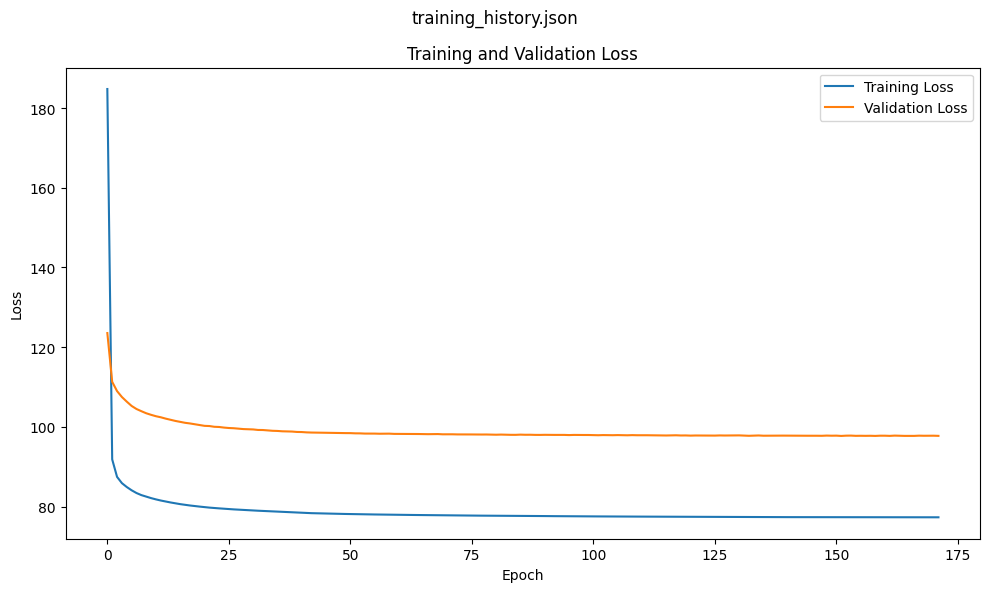

Individual training and validation loss curves saved in /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/Individual_Plots


In [40]:
plot_curves('/content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files')

In [41]:
trained_model = load_trained_model(model,'/content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/best_model.pth')

Model loaded 


In [133]:

def get_z(model, dataloader, device="cpu"):
    """
    Get latent space representation (z) for all cells.

    Parameters:
        model: Trained VAE model.
        dataloader: DataLoader with the dataset to process.
        device: Device to perform computation on (default: "cpu").

    Returns:
        z_array: Numpy array of shape (n_cells, latent_dim).
    """
    model.eval()  # Set model to evaluation mode
    model.to(device)

    z_list = []

    with torch.no_grad():
        for x in dataloader:
            x = x.to(device)
            mean, logvar = model.encoder(x)
            z = model.reparameterize(mean, logvar)  # Use reparameterization trick
            z_list.append(z.cpu().numpy())

    z_array = np.vstack(z_list)  # Combine all batches into one array
    return z_array


def get_gene_expression(model, z_array, device="cpu"):
    """
    Reconstruct gene expression for all cells using the decoder.

    Parameters:
        model: Trained VAE model.
        z_array: Numpy array of latent space (shape: n_cells x latent_dim).
        device: Device to perform computation on (default: "cpu").

    Returns:
        gene_expression_array: Numpy array of shape (n_cells, n_genes).
    """
    model.eval()  # Set model to evaluation mode
    model.to(device)

    z_tensor = torch.tensor(z_array, dtype=torch.float32).to(device)  # Convert z_array to tensor
    gene_expression_list = []

    with torch.no_grad():
        for z in z_tensor.split(64):  # Process in batches of 64 to avoid memory issues
            scale, _, _ = model.decoder(z)  # Only use the scale (mean gene expression)
            gene_expression_list.append(scale.cpu().numpy())

    gene_expression_array = np.vstack(gene_expression_list)  # Combine all batches into one array
    return gene_expression_array

In [130]:
adata_inference = tma_data_subset_inference[0].copy()
adata_inference


AnnData object with n_obs × n_vars = 7616 × 500
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'ident', 'celltype', 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Graph_DF', 'barcode_mapping', 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'pca', 'spatial', 'umap'
    varm: 'PCs'
    layers: 'counts', 'norm'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [132]:
counts =  adata_inference.layers["counts"].toarray()
counts_tensor = torch.tensor(counts, dtype=torch.float32)
dataset = GeneExpressionDataset(counts_tensor)
dataloader = DataLoader(dataset, batch_size=128, shuffle=False)

Latent space shape: (7616, 30)
Reconstructed gene expression shape: (7616, 500)


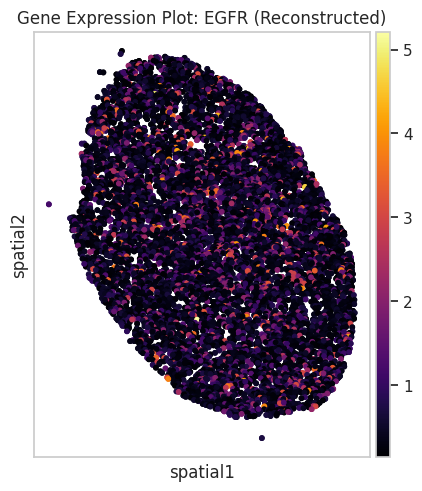

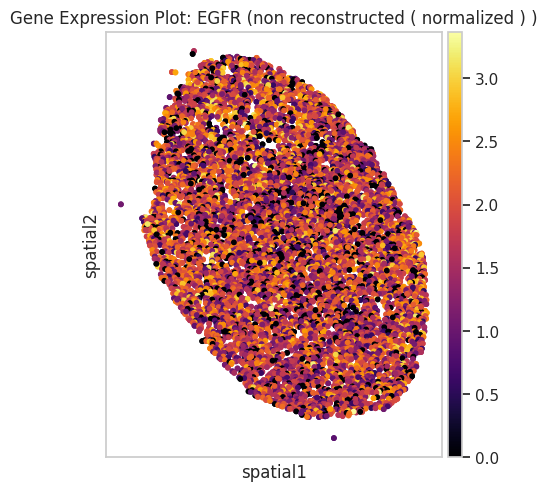

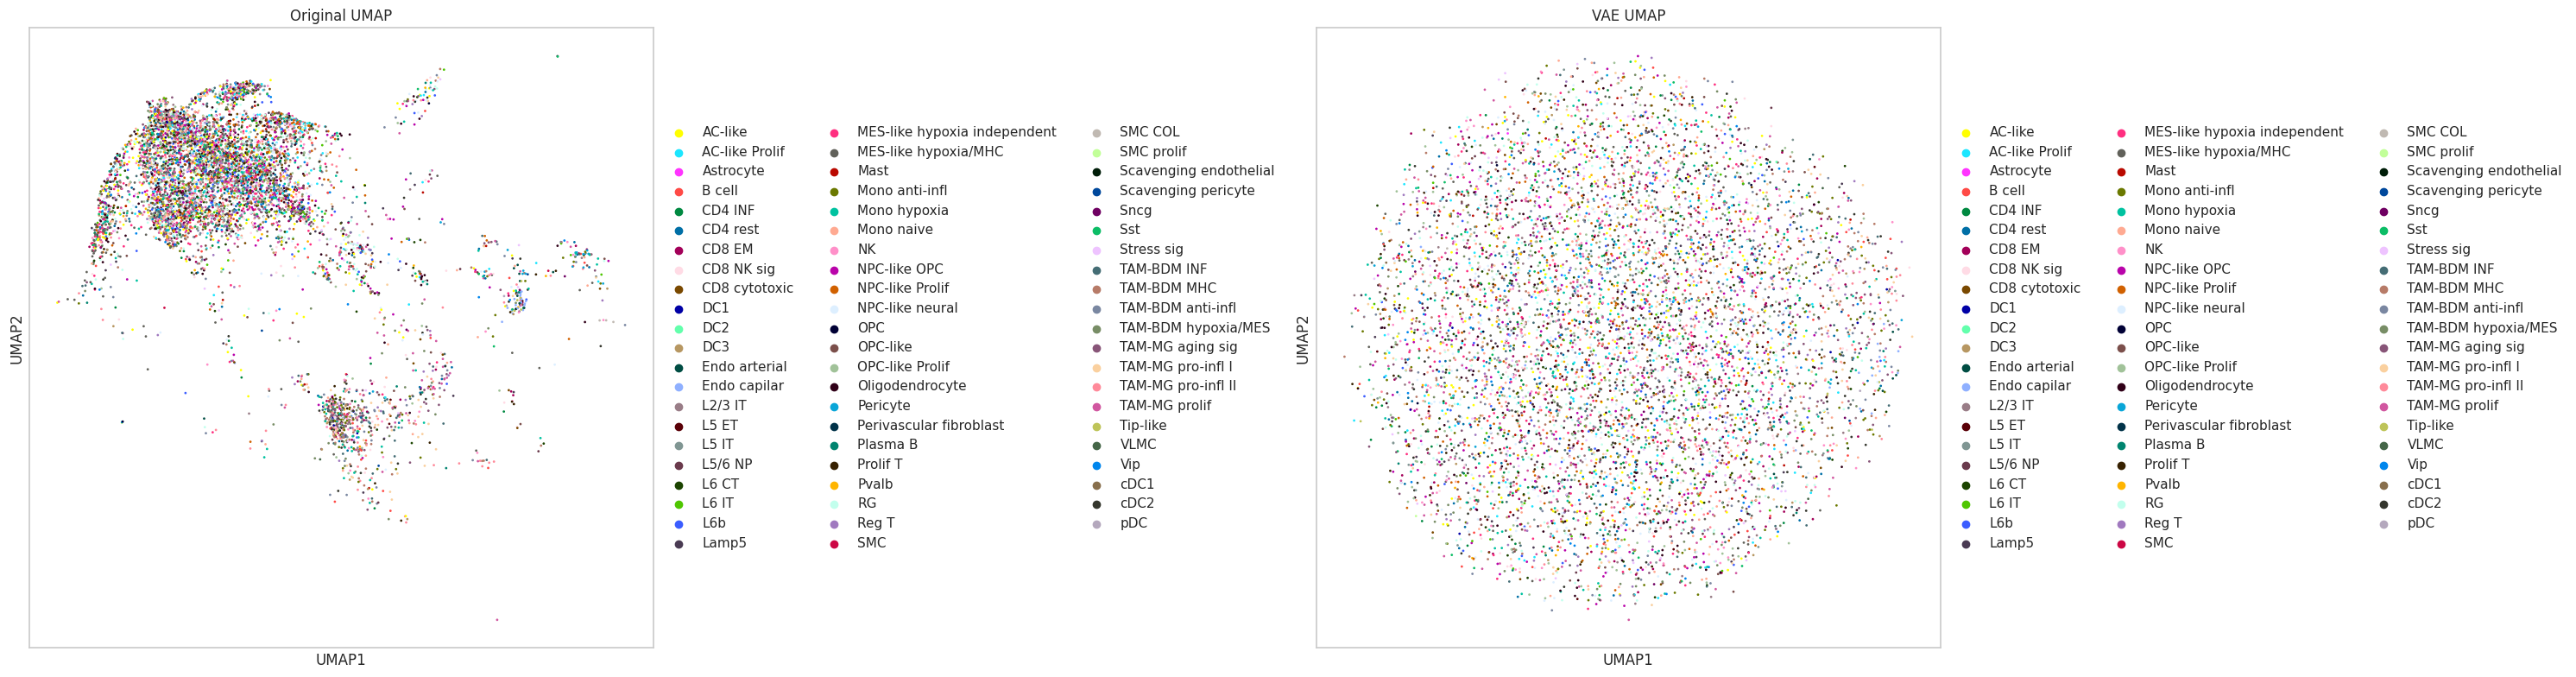

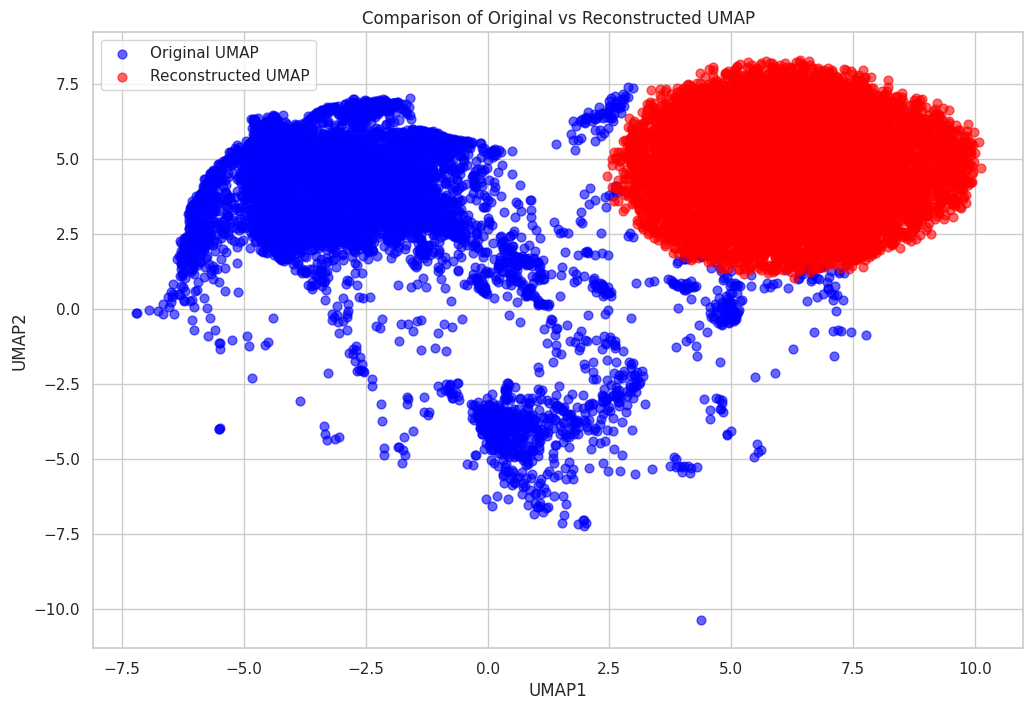


UMAP coordinate correlations:
UMAP1: r=0.2282 (p=1.5057e-90)
UMAP2: r=-0.0447 (p=9.5053e-05)


In [60]:
import squidpy as sq
def compare_umap_real_vs_reconstructed(trained_model, dataloader, adata, gene="EGFR", device="cpu"):
    """
    Compare Real UMAP with Reconstructed UMAP (VAE Latent Space).
    """
    # Step 1: Get latent space and reconstructions
    Z = get_z(trained_model, dataloader, device=device)
    print("Latent space shape:", Z.shape)
    recon = get_gene_expression(trained_model, Z, device=device)
    print("Reconstructed gene expression shape:", recon.shape)

    # Step 2: Create a copy for UMAP visualization
    adata_vae = adata.copy()

    # Step 3: Store results
    adata_vae.obsm["VAE_latent"] = Z
    adata_vae.layers["X_VAE"] = recon

    # Step 4: Plot Gene Expression if specified
    if gene is not None:
        adata_exp = adata.copy()
        adata_exp.X = recon  # Use reconstructed data
        sns.set(style="whitegrid")
        sq.pl.spatial_scatter(adata_exp,
                            shape=None,
                            color=[gene],
                            size=40,
                            cmap="inferno")
        plt.title(f"Gene Expression Plot: {gene} (Reconstructed)")
        plt.show()

        adata.X = adata.layers["norm"]  # Use original data
        sns.set(style="whitegrid")
        sq.pl.spatial_scatter(adata,
                            shape=None,
                            color=[gene],
                            size=40,
                            cmap="inferno")
        plt.title(f"Gene Expression Plot: {gene} (non reconstructed ( normalized ) )")
        plt.show()


    # Step 5: Get original UMAP (prioritize 'umap' slot)
    original_umap = adata.obsm['umap'].copy()

    # Step 6: Compute new UMAP from latent space
    sc.pp.neighbors(adata_vae, use_rep="VAE_latent")
    sc.tl.umap(adata_vae)
    reconstructed_umap = adata_vae.obsm['X_umap'].copy()

    # Step 7: Plot UMAPs
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 8))

    # Plot original
    adata_vae.obsm['umap'] = original_umap
    sc.pl.umap(adata_vae,
               color=['celltype'],
               ax=ax1,
               show=False,
               title='Original UMAP')

    # Plot reconstructed
    adata_vae.obsm['umap'] = reconstructed_umap
    sc.pl.umap(adata_vae,
               color=['celltype'],
               ax=ax2,
               show=False,
               title='VAE UMAP')

    plt.tight_layout()
    plt.show()

    # Step 8: Plot comparison overlay
    plt.figure(figsize=(12, 8))
    plt.scatter(original_umap[:, 0], original_umap[:, 1],
               c='blue', label='Original UMAP', alpha=0.6, s=40)
    plt.scatter(reconstructed_umap[:, 0], reconstructed_umap[:, 1],
               c='red', label='Reconstructed UMAP', alpha=0.6, s=40)
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.title('Comparison of Original vs Reconstructed UMAP')
    plt.legend()
    plt.show()

    # Print correlations
    corr_umap1, p1 = pearsonr(original_umap[:, 0], reconstructed_umap[:, 0])
    corr_umap2, p2 = pearsonr(original_umap[:, 1], reconstructed_umap[:, 1])
    print(f"\nUMAP coordinate correlations:")
    print(f"UMAP1: r={corr_umap1:.4f} (p={p1:.4e})")
    print(f"UMAP2: r={corr_umap2:.4f} (p={p2:.4e})")

    return original_umap, reconstructed_umap



original, reconstructed = compare_umap_real_vs_reconstructed(
    trained_model=trained_model,
    dataloader=dataloader,
    adata=adata_inference,
    device="cuda"
)

#Try simple model V2 128 Hidden dim

---



In [122]:
Simple_model_VAE_2=VAE_v2(input_dim=500, latent_dim=30, encoder_hidden_dims=[64,128], decoder_hidden_dims=[128,64],dropout_rate=0.2)
summary(Simple_model_VAE_2)
optimizer = torch.optim.Adam(Simple_model_VAE_2.parameters(), lr=1e-5, weight_decay=1e-4)

In [123]:
# Train the model
loss_Vae_v2_simple = train_vae(
                   Simple_model_VAE_2,
                   train_dataloader,
                   val_dataloader,
                   400, optimizer,
                   '/content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model',
                   device="cuda")

  0%|          | 1/400 [00:29<3:14:22, 29.23s/it]


Epoch 1
Train Loss: 304.9125 (KLD=3.6523, ZINB=301.2602)
Val Loss: 257.3529 (KLD=1.6216, ZINB=255.7313)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


  0%|          | 2/400 [00:58<3:13:33, 29.18s/it]


Epoch 2
Train Loss: 175.6642 (KLD=2.6499, ZINB=173.0142)
Val Loss: 163.6869 (KLD=1.2645, ZINB=162.4225)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


  1%|          | 3/400 [01:27<3:12:35, 29.11s/it]


Epoch 3
Train Loss: 118.1982 (KLD=2.1549, ZINB=116.0433)
Val Loss: 127.0027 (KLD=0.9700, ZINB=126.0327)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


  1%|          | 4/400 [01:56<3:11:57, 29.08s/it]


Epoch 4
Train Loss: 98.1283 (KLD=1.7281, ZINB=96.4003)
Val Loss: 115.9799 (KLD=0.7817, ZINB=115.1982)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


  1%|▏         | 5/400 [02:25<3:12:02, 29.17s/it]


Epoch 5
Train Loss: 91.6963 (KLD=1.5560, ZINB=90.1403)
Val Loss: 112.1632 (KLD=1.1716, ZINB=110.9916)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


  2%|▏         | 6/400 [02:54<3:11:12, 29.12s/it]


Epoch 6
Train Loss: 88.9678 (KLD=1.6316, ZINB=87.3362)
Val Loss: 110.2448 (KLD=1.3944, ZINB=108.8504)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


  2%|▏         | 7/400 [03:23<3:10:52, 29.14s/it]


Epoch 7
Train Loss: 87.4815 (KLD=1.6196, ZINB=85.8619)
Val Loss: 108.9776 (KLD=1.5283, ZINB=107.4493)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


  2%|▏         | 8/400 [03:53<3:10:21, 29.14s/it]


Epoch 8
Train Loss: 86.5043 (KLD=1.5760, ZINB=84.9283)
Val Loss: 108.0374 (KLD=1.5651, ZINB=106.4722)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


  2%|▏         | 9/400 [04:21<3:09:21, 29.06s/it]


Epoch 9
Train Loss: 85.7926 (KLD=1.5404, ZINB=84.2522)
Val Loss: 107.4654 (KLD=1.5687, ZINB=105.8967)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


  2%|▎         | 10/400 [04:50<3:08:27, 28.99s/it]


Epoch 10
Train Loss: 85.2707 (KLD=1.5141, ZINB=83.7566)
Val Loss: 106.9739 (KLD=1.6142, ZINB=105.3597)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


  3%|▎         | 11/400 [05:20<3:08:30, 29.07s/it]


Epoch 11
Train Loss: 84.8630 (KLD=1.5040, ZINB=83.3590)
Val Loss: 106.5530 (KLD=1.5612, ZINB=104.9918)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


  3%|▎         | 12/400 [05:49<3:08:27, 29.14s/it]


Epoch 12
Train Loss: 84.5134 (KLD=1.5066, ZINB=83.0068)
Val Loss: 106.2293 (KLD=1.6045, ZINB=104.6247)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


  3%|▎         | 13/400 [06:18<3:08:10, 29.17s/it]


Epoch 13
Train Loss: 84.2079 (KLD=1.5148, ZINB=82.6931)
Val Loss: 105.9090 (KLD=1.6318, ZINB=104.2772)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


  4%|▎         | 14/400 [06:47<3:07:12, 29.10s/it]


Epoch 14
Train Loss: 83.9006 (KLD=1.5399, ZINB=82.3608)
Val Loss: 105.5718 (KLD=1.7322, ZINB=103.8396)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


  4%|▍         | 15/400 [07:16<3:05:59, 28.98s/it]


Epoch 15
Train Loss: 83.6028 (KLD=1.5976, ZINB=82.0052)
Val Loss: 105.1640 (KLD=1.7411, ZINB=103.4229)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


  4%|▍         | 16/400 [07:45<3:05:39, 29.01s/it]


Epoch 16
Train Loss: 83.2755 (KLD=1.6793, ZINB=81.5962)
Val Loss: 104.8113 (KLD=1.8782, ZINB=102.9331)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


  4%|▍         | 17/400 [08:14<3:04:56, 28.97s/it]


Epoch 17
Train Loss: 82.9536 (KLD=1.7727, ZINB=81.1809)
Val Loss: 104.2646 (KLD=1.9318, ZINB=102.3328)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


  4%|▍         | 18/400 [08:43<3:04:20, 28.95s/it]


Epoch 18
Train Loss: 82.6249 (KLD=1.8579, ZINB=80.7669)
Val Loss: 103.7852 (KLD=2.1292, ZINB=101.6560)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


  5%|▍         | 19/400 [09:12<3:04:17, 29.02s/it]


Epoch 19
Train Loss: 82.3562 (KLD=1.9401, ZINB=80.4161)
Val Loss: 103.4598 (KLD=2.1717, ZINB=101.2881)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


  5%|▌         | 20/400 [09:41<3:04:04, 29.07s/it]


Epoch 20
Train Loss: 82.1071 (KLD=1.9908, ZINB=80.1163)
Val Loss: 103.0944 (KLD=2.1874, ZINB=100.9070)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


  5%|▌         | 21/400 [10:10<3:04:22, 29.19s/it]


Epoch 21
Train Loss: 81.9038 (KLD=2.0335, ZINB=79.8703)
Val Loss: 102.8807 (KLD=2.1526, ZINB=100.7281)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


  6%|▌         | 22/400 [10:40<3:03:50, 29.18s/it]


Epoch 22
Train Loss: 81.7215 (KLD=2.0643, ZINB=79.6572)
Val Loss: 102.6159 (KLD=2.3017, ZINB=100.3141)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


  6%|▌         | 23/400 [11:09<3:03:15, 29.17s/it]


Epoch 23
Train Loss: 81.5646 (KLD=2.0894, ZINB=79.4752)
Val Loss: 102.4403 (KLD=2.2160, ZINB=100.2242)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


  6%|▌         | 24/400 [11:38<3:02:12, 29.08s/it]


Epoch 24
Train Loss: 81.4331 (KLD=2.1092, ZINB=79.3238)
Val Loss: 102.3118 (KLD=2.3350, ZINB=99.9768)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


  6%|▋         | 25/400 [12:07<3:01:30, 29.04s/it]


Epoch 25
Train Loss: 81.3166 (KLD=2.1313, ZINB=79.1853)
Val Loss: 102.1287 (KLD=2.3082, ZINB=99.8205)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


  6%|▋         | 26/400 [12:36<3:00:50, 29.01s/it]


Epoch 26
Train Loss: 81.1937 (KLD=2.1454, ZINB=79.0483)
Val Loss: 102.0245 (KLD=2.3096, ZINB=99.7149)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


  7%|▋         | 27/400 [13:05<3:00:51, 29.09s/it]


Epoch 27
Train Loss: 81.0870 (KLD=2.1570, ZINB=78.9300)
Val Loss: 101.8734 (KLD=2.3590, ZINB=99.5144)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


  7%|▋         | 28/400 [13:34<2:59:56, 29.02s/it]


Epoch 28
Train Loss: 80.9899 (KLD=2.1766, ZINB=78.8133)
Val Loss: 101.7599 (KLD=2.3365, ZINB=99.4234)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


  7%|▋         | 29/400 [14:03<2:59:42, 29.06s/it]


Epoch 29
Train Loss: 80.8975 (KLD=2.1944, ZINB=78.7031)
Val Loss: 101.6477 (KLD=2.3907, ZINB=99.2570)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


  8%|▊         | 30/400 [14:32<3:00:12, 29.22s/it]


Epoch 30
Train Loss: 80.8012 (KLD=2.2079, ZINB=78.5933)
Val Loss: 101.4612 (KLD=2.3778, ZINB=99.0834)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


  8%|▊         | 31/400 [15:02<3:00:02, 29.27s/it]


Epoch 31
Train Loss: 80.7078 (KLD=2.2242, ZINB=78.4836)
Val Loss: 101.3987 (KLD=2.4084, ZINB=98.9903)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


  8%|▊         | 32/400 [15:31<3:00:14, 29.39s/it]


Epoch 32
Train Loss: 80.6226 (KLD=2.2369, ZINB=78.3856)
Val Loss: 101.3425 (KLD=2.4407, ZINB=98.9018)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


  8%|▊         | 33/400 [16:01<2:59:27, 29.34s/it]


Epoch 33
Train Loss: 80.5339 (KLD=2.2523, ZINB=78.2816)
Val Loss: 101.1981 (KLD=2.3937, ZINB=98.8045)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


  8%|▊         | 34/400 [16:30<2:59:21, 29.40s/it]


Epoch 34
Train Loss: 80.4477 (KLD=2.2636, ZINB=78.1842)
Val Loss: 101.0734 (KLD=2.4895, ZINB=98.5839)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


  9%|▉         | 35/400 [16:59<2:58:27, 29.34s/it]


Epoch 35
Train Loss: 80.3643 (KLD=2.2792, ZINB=78.0851)
Val Loss: 101.0214 (KLD=2.5105, ZINB=98.5109)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


  9%|▉         | 36/400 [17:28<2:56:56, 29.17s/it]


Epoch 36
Train Loss: 80.2917 (KLD=2.2938, ZINB=77.9979)
Val Loss: 100.8824 (KLD=2.5761, ZINB=98.3063)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


  9%|▉         | 37/400 [17:58<2:57:26, 29.33s/it]


Epoch 37
Train Loss: 80.2070 (KLD=2.3054, ZINB=77.9016)
Val Loss: 100.7859 (KLD=2.4440, ZINB=98.3418)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 10%|▉         | 38/400 [18:27<2:56:53, 29.32s/it]


Epoch 38
Train Loss: 80.1402 (KLD=2.3198, ZINB=77.8204)
Val Loss: 100.6870 (KLD=2.4629, ZINB=98.2241)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 10%|▉         | 39/400 [18:56<2:55:55, 29.24s/it]


Epoch 39
Train Loss: 80.0704 (KLD=2.3357, ZINB=77.7348)
Val Loss: 100.6186 (KLD=2.5967, ZINB=98.0219)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 10%|█         | 40/400 [19:26<2:56:04, 29.34s/it]


Epoch 40
Train Loss: 80.0046 (KLD=2.3497, ZINB=77.6548)
Val Loss: 100.5258 (KLD=2.5210, ZINB=98.0048)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 10%|█         | 41/400 [19:55<2:55:11, 29.28s/it]


Epoch 41
Train Loss: 79.9465 (KLD=2.3588, ZINB=77.5877)
Val Loss: 100.4484 (KLD=2.4601, ZINB=97.9883)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 10%|█         | 42/400 [20:24<2:54:53, 29.31s/it]


Epoch 42
Train Loss: 79.8833 (KLD=2.3731, ZINB=77.5103)
Val Loss: 100.3964 (KLD=2.4911, ZINB=97.9053)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 11%|█         | 43/400 [20:53<2:53:28, 29.16s/it]


Epoch 43
Train Loss: 79.8304 (KLD=2.3897, ZINB=77.4407)
Val Loss: 100.3312 (KLD=2.5023, ZINB=97.8290)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 11%|█         | 44/400 [21:22<2:52:26, 29.06s/it]


Epoch 44
Train Loss: 79.7857 (KLD=2.4021, ZINB=77.3836)
Val Loss: 100.2660 (KLD=2.5254, ZINB=97.7407)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 11%|█▏        | 45/400 [21:51<2:51:20, 28.96s/it]


Epoch 45
Train Loss: 79.7358 (KLD=2.4167, ZINB=77.3191)
Val Loss: 100.1739 (KLD=2.5744, ZINB=97.5996)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 12%|█▏        | 46/400 [22:19<2:50:15, 28.86s/it]


Epoch 46
Train Loss: 79.6887 (KLD=2.4293, ZINB=77.2594)
Val Loss: 100.1124 (KLD=2.5573, ZINB=97.5551)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 12%|█▏        | 47/400 [22:48<2:49:40, 28.84s/it]


Epoch 47
Train Loss: 79.6557 (KLD=2.4497, ZINB=77.2060)
Val Loss: 100.0650 (KLD=2.5965, ZINB=97.4685)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 12%|█▏        | 48/400 [23:17<2:49:17, 28.86s/it]


Epoch 48
Train Loss: 79.6040 (KLD=2.4595, ZINB=77.1446)
Val Loss: 99.9946 (KLD=2.5805, ZINB=97.4141)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 12%|█▏        | 49/400 [23:46<2:48:36, 28.82s/it]


Epoch 49
Train Loss: 79.5639 (KLD=2.4743, ZINB=77.0895)
Val Loss: 99.9241 (KLD=2.6013, ZINB=97.3228)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 12%|█▎        | 50/400 [24:15<2:48:26, 28.88s/it]


Epoch 50
Train Loss: 79.5291 (KLD=2.4922, ZINB=77.0369)
Val Loss: 99.8850 (KLD=2.6237, ZINB=97.2613)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 13%|█▎        | 51/400 [24:44<2:48:49, 29.02s/it]


Epoch 51
Train Loss: 79.4829 (KLD=2.5043, ZINB=76.9786)
Val Loss: 99.8055 (KLD=2.6695, ZINB=97.1361)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 13%|█▎        | 52/400 [25:14<2:49:57, 29.30s/it]


Epoch 52
Train Loss: 79.4394 (KLD=2.5180, ZINB=76.9214)
Val Loss: 99.7880 (KLD=2.6931, ZINB=97.0949)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 13%|█▎        | 53/400 [25:44<2:49:59, 29.39s/it]


Epoch 53
Train Loss: 79.4020 (KLD=2.5359, ZINB=76.8661)
Val Loss: 99.7143 (KLD=2.6586, ZINB=97.0557)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 14%|█▎        | 54/400 [26:13<2:48:53, 29.29s/it]


Epoch 54
Train Loss: 79.3485 (KLD=2.5413, ZINB=76.8072)
Val Loss: 99.6538 (KLD=2.7120, ZINB=96.9418)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 14%|█▍        | 55/400 [26:42<2:47:50, 29.19s/it]


Epoch 55
Train Loss: 79.3261 (KLD=2.5623, ZINB=76.7638)
Val Loss: 99.6426 (KLD=2.7458, ZINB=96.8968)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 14%|█▍        | 56/400 [27:10<2:46:35, 29.06s/it]


Epoch 56
Train Loss: 79.2942 (KLD=2.5785, ZINB=76.7156)
Val Loss: 99.5874 (KLD=2.8001, ZINB=96.7873)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 14%|█▍        | 57/400 [27:39<2:45:32, 28.96s/it]


Epoch 57
Train Loss: 79.2607 (KLD=2.5890, ZINB=76.6717)
Val Loss: 99.5372 (KLD=2.7471, ZINB=96.7902)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 14%|█▍        | 58/400 [28:08<2:44:31, 28.86s/it]


Epoch 58
Train Loss: 79.2373 (KLD=2.6061, ZINB=76.6312)
Val Loss: 99.5020 (KLD=2.6893, ZINB=96.8127)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 15%|█▍        | 59/400 [28:37<2:44:16, 28.90s/it]


Epoch 59
Train Loss: 79.2086 (KLD=2.6189, ZINB=76.5897)
Val Loss: 99.4469 (KLD=2.6934, ZINB=96.7535)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 15%|█▌        | 60/400 [29:06<2:43:38, 28.88s/it]


Epoch 60
Train Loss: 79.1795 (KLD=2.6329, ZINB=76.5467)
Val Loss: 99.4370 (KLD=2.7793, ZINB=96.6577)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 15%|█▌        | 61/400 [29:35<2:43:16, 28.90s/it]


Epoch 61
Train Loss: 79.1547 (KLD=2.6380, ZINB=76.5167)
Val Loss: 99.3823 (KLD=2.7343, ZINB=96.6480)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 16%|█▌        | 62/400 [30:03<2:42:42, 28.88s/it]


Epoch 62
Train Loss: 79.1359 (KLD=2.6524, ZINB=76.4835)
Val Loss: 99.3531 (KLD=2.8616, ZINB=96.4914)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 16%|█▌        | 63/400 [30:32<2:41:49, 28.81s/it]


Epoch 63
Train Loss: 79.1075 (KLD=2.6595, ZINB=76.4480)
Val Loss: 99.3464 (KLD=2.7672, ZINB=96.5792)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 16%|█▌        | 64/400 [31:01<2:41:46, 28.89s/it]


Epoch 64
Train Loss: 79.0853 (KLD=2.6675, ZINB=76.4178)
Val Loss: 99.2659 (KLD=2.7891, ZINB=96.4768)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 16%|█▋        | 65/400 [31:30<2:41:18, 28.89s/it]


Epoch 65
Train Loss: 79.0669 (KLD=2.6771, ZINB=76.3898)
Val Loss: 99.2822 (KLD=2.8037, ZINB=96.4785)
Learning Rate: 0.000010
INFO: Early stopping counter 1 of 20


 16%|█▋        | 66/400 [31:59<2:40:57, 28.92s/it]


Epoch 66
Train Loss: 79.0487 (KLD=2.6889, ZINB=76.3598)
Val Loss: 99.2978 (KLD=2.8475, ZINB=96.4504)
Learning Rate: 0.000010
INFO: Early stopping counter 2 of 20


 17%|█▋        | 67/400 [32:28<2:40:34, 28.93s/it]


Epoch 67
Train Loss: 79.0289 (KLD=2.6955, ZINB=76.3334)
Val Loss: 99.2072 (KLD=2.8823, ZINB=96.3248)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 17%|█▋        | 68/400 [32:57<2:39:58, 28.91s/it]


Epoch 68
Train Loss: 79.0088 (KLD=2.6990, ZINB=76.3098)
Val Loss: 99.1872 (KLD=2.8854, ZINB=96.3018)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 17%|█▋        | 69/400 [33:26<2:39:27, 28.90s/it]


Epoch 69
Train Loss: 78.9785 (KLD=2.7029, ZINB=76.2756)
Val Loss: 99.1688 (KLD=2.8371, ZINB=96.3317)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 18%|█▊        | 70/400 [33:55<2:38:54, 28.89s/it]


Epoch 70
Train Loss: 78.9768 (KLD=2.7162, ZINB=76.2607)
Val Loss: 99.1426 (KLD=2.8776, ZINB=96.2650)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 18%|█▊        | 71/400 [34:24<2:38:47, 28.96s/it]


Epoch 71
Train Loss: 78.9538 (KLD=2.7179, ZINB=76.2360)
Val Loss: 99.0879 (KLD=2.9132, ZINB=96.1746)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 18%|█▊        | 72/400 [34:53<2:38:04, 28.92s/it]


Epoch 72
Train Loss: 78.9342 (KLD=2.7254, ZINB=76.2088)
Val Loss: 99.0926 (KLD=2.8982, ZINB=96.1944)
Learning Rate: 0.000010
INFO: Early stopping counter 1 of 20


 18%|█▊        | 73/400 [35:21<2:37:17, 28.86s/it]


Epoch 73
Train Loss: 78.9157 (KLD=2.7280, ZINB=76.1877)
Val Loss: 99.0289 (KLD=2.9073, ZINB=96.1216)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 18%|█▊        | 74/400 [35:50<2:37:04, 28.91s/it]


Epoch 74
Train Loss: 78.9011 (KLD=2.7346, ZINB=76.1666)
Val Loss: 99.0672 (KLD=2.9303, ZINB=96.1369)
Learning Rate: 0.000010
INFO: Early stopping counter 1 of 20


 19%|█▉        | 75/400 [36:19<2:36:23, 28.87s/it]


Epoch 75
Train Loss: 78.8916 (KLD=2.7426, ZINB=76.1490)
Val Loss: 99.0925 (KLD=2.9346, ZINB=96.1579)
Learning Rate: 0.000010
INFO: Early stopping counter 2 of 20


 19%|█▉        | 76/400 [36:48<2:35:45, 28.84s/it]


Epoch 76
Train Loss: 78.8714 (KLD=2.7446, ZINB=76.1269)
Val Loss: 99.0139 (KLD=2.8797, ZINB=96.1341)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 19%|█▉        | 77/400 [37:17<2:35:09, 28.82s/it]


Epoch 77
Train Loss: 78.8597 (KLD=2.7530, ZINB=76.1067)
Val Loss: 99.0179 (KLD=2.9195, ZINB=96.0983)
Learning Rate: 0.000010
INFO: Early stopping counter 1 of 20


 20%|█▉        | 78/400 [37:45<2:34:33, 28.80s/it]


Epoch 78
Train Loss: 78.8462 (KLD=2.7580, ZINB=76.0882)
Val Loss: 99.0003 (KLD=2.9236, ZINB=96.0767)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 20%|█▉        | 79/400 [38:15<2:34:59, 28.97s/it]


Epoch 79
Train Loss: 78.8382 (KLD=2.7676, ZINB=76.0706)
Val Loss: 98.9590 (KLD=2.9255, ZINB=96.0335)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 20%|██        | 80/400 [38:44<2:35:39, 29.18s/it]


Epoch 80
Train Loss: 78.8153 (KLD=2.7640, ZINB=76.0513)
Val Loss: 98.9458 (KLD=2.9290, ZINB=96.0167)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 20%|██        | 81/400 [39:13<2:34:45, 29.11s/it]


Epoch 81
Train Loss: 78.7999 (KLD=2.7671, ZINB=76.0328)
Val Loss: 98.9326 (KLD=2.8965, ZINB=96.0361)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 20%|██        | 82/400 [39:42<2:34:02, 29.07s/it]


Epoch 82
Train Loss: 78.7948 (KLD=2.7796, ZINB=76.0153)
Val Loss: 98.9524 (KLD=2.9565, ZINB=95.9959)
Learning Rate: 0.000010
INFO: Early stopping counter 1 of 20


 21%|██        | 83/400 [40:11<2:33:23, 29.03s/it]


Epoch 83
Train Loss: 78.7810 (KLD=2.7804, ZINB=76.0005)
Val Loss: 98.9226 (KLD=3.0236, ZINB=95.8989)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 21%|██        | 84/400 [40:40<2:32:03, 28.87s/it]


Epoch 84
Train Loss: 78.7712 (KLD=2.7845, ZINB=75.9867)
Val Loss: 98.8948 (KLD=2.9512, ZINB=95.9435)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 21%|██▏       | 85/400 [41:08<2:31:19, 28.82s/it]


Epoch 85
Train Loss: 78.7566 (KLD=2.7836, ZINB=75.9729)
Val Loss: 98.9189 (KLD=2.9456, ZINB=95.9733)
Learning Rate: 0.000010
INFO: Early stopping counter 1 of 20


 22%|██▏       | 86/400 [41:37<2:30:47, 28.81s/it]


Epoch 86
Train Loss: 78.7461 (KLD=2.7927, ZINB=75.9534)
Val Loss: 98.8902 (KLD=2.9747, ZINB=95.9155)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 22%|██▏       | 87/400 [42:06<2:30:28, 28.85s/it]


Epoch 87
Train Loss: 78.7469 (KLD=2.7977, ZINB=75.9492)
Val Loss: 98.8725 (KLD=2.9440, ZINB=95.9285)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 22%|██▏       | 88/400 [42:35<2:30:00, 28.85s/it]


Epoch 88
Train Loss: 78.7290 (KLD=2.8001, ZINB=75.9289)
Val Loss: 98.8580 (KLD=2.9179, ZINB=95.9401)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 22%|██▏       | 89/400 [43:04<2:29:22, 28.82s/it]


Epoch 89
Train Loss: 78.7163 (KLD=2.8021, ZINB=75.9143)
Val Loss: 98.8882 (KLD=2.9177, ZINB=95.9705)
Learning Rate: 0.000010
INFO: Early stopping counter 1 of 20


 22%|██▎       | 90/400 [43:33<2:29:08, 28.87s/it]


Epoch 90
Train Loss: 78.7064 (KLD=2.8073, ZINB=75.8991)
Val Loss: 98.8445 (KLD=2.9042, ZINB=95.9404)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 23%|██▎       | 91/400 [44:02<2:28:57, 28.92s/it]


Epoch 91
Train Loss: 78.6888 (KLD=2.8055, ZINB=75.8833)
Val Loss: 98.8397 (KLD=2.9647, ZINB=95.8750)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 23%|██▎       | 92/400 [44:31<2:28:37, 28.95s/it]


Epoch 92
Train Loss: 78.6897 (KLD=2.8137, ZINB=75.8760)
Val Loss: 98.8457 (KLD=2.9415, ZINB=95.9042)
Learning Rate: 0.000010
INFO: Early stopping counter 1 of 20


 23%|██▎       | 93/400 [45:00<2:28:22, 29.00s/it]


Epoch 93
Train Loss: 78.6761 (KLD=2.8134, ZINB=75.8627)
Val Loss: 98.7850 (KLD=2.9816, ZINB=95.8034)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 24%|██▎       | 94/400 [45:29<2:28:02, 29.03s/it]


Epoch 94
Train Loss: 78.6643 (KLD=2.8155, ZINB=75.8488)
Val Loss: 98.8142 (KLD=3.0020, ZINB=95.8122)
Learning Rate: 0.000010
INFO: Early stopping counter 1 of 20


 24%|██▍       | 95/400 [45:58<2:27:51, 29.09s/it]


Epoch 95
Train Loss: 78.6586 (KLD=2.8231, ZINB=75.8354)
Val Loss: 98.8168 (KLD=2.8880, ZINB=95.9288)
Learning Rate: 0.000010
INFO: Early stopping counter 2 of 20


 24%|██▍       | 96/400 [46:28<2:27:44, 29.16s/it]


Epoch 96
Train Loss: 78.6417 (KLD=2.8192, ZINB=75.8225)
Val Loss: 98.7835 (KLD=2.9409, ZINB=95.8427)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 24%|██▍       | 97/400 [46:57<2:27:21, 29.18s/it]


Epoch 97
Train Loss: 78.6356 (KLD=2.8255, ZINB=75.8101)
Val Loss: 98.7615 (KLD=3.0078, ZINB=95.7537)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 24%|██▍       | 98/400 [47:26<2:26:44, 29.15s/it]


Epoch 98
Train Loss: 78.6311 (KLD=2.8288, ZINB=75.8023)
Val Loss: 98.7897 (KLD=2.9417, ZINB=95.8480)
Learning Rate: 0.000010
INFO: Early stopping counter 1 of 20


 25%|██▍       | 99/400 [47:55<2:26:10, 29.14s/it]


Epoch 99
Train Loss: 78.6219 (KLD=2.8290, ZINB=75.7929)
Val Loss: 98.7850 (KLD=3.0051, ZINB=95.7799)
Learning Rate: 0.000010
INFO: Early stopping counter 2 of 20


 25%|██▌       | 100/400 [48:24<2:25:21, 29.07s/it]


Epoch 100
Train Loss: 78.6133 (KLD=2.8359, ZINB=75.7774)
Val Loss: 98.7603 (KLD=2.8926, ZINB=95.8677)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 25%|██▌       | 101/400 [48:53<2:24:41, 29.04s/it]


Epoch 101
Train Loss: 78.6037 (KLD=2.8365, ZINB=75.7672)
Val Loss: 98.7196 (KLD=3.0194, ZINB=95.7002)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 26%|██▌       | 102/400 [49:22<2:24:04, 29.01s/it]


Epoch 102
Train Loss: 78.5973 (KLD=2.8428, ZINB=75.7545)
Val Loss: 98.7119 (KLD=3.0067, ZINB=95.7052)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 26%|██▌       | 103/400 [49:51<2:23:38, 29.02s/it]


Epoch 103
Train Loss: 78.5874 (KLD=2.8378, ZINB=75.7496)
Val Loss: 98.6980 (KLD=3.0115, ZINB=95.6865)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 26%|██▌       | 104/400 [50:20<2:23:22, 29.06s/it]


Epoch 104
Train Loss: 78.5759 (KLD=2.8420, ZINB=75.7339)
Val Loss: 98.6994 (KLD=2.9963, ZINB=95.7032)
Learning Rate: 0.000010
INFO: Early stopping counter 1 of 20


 26%|██▋       | 105/400 [50:50<2:24:10, 29.32s/it]


Epoch 105
Train Loss: 78.5617 (KLD=2.8414, ZINB=75.7203)
Val Loss: 98.7131 (KLD=3.0426, ZINB=95.6705)
Learning Rate: 0.000010
INFO: Early stopping counter 2 of 20


 26%|██▋       | 106/400 [51:20<2:24:24, 29.47s/it]


Epoch 106
Train Loss: 78.5676 (KLD=2.8465, ZINB=75.7211)
Val Loss: 98.6691 (KLD=3.0107, ZINB=95.6583)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 27%|██▋       | 107/400 [51:49<2:23:40, 29.42s/it]


Epoch 107
Train Loss: 78.5578 (KLD=2.8520, ZINB=75.7058)
Val Loss: 98.7181 (KLD=3.0502, ZINB=95.6679)
Learning Rate: 0.000010
INFO: Early stopping counter 1 of 20


 27%|██▋       | 108/400 [52:18<2:23:04, 29.40s/it]


Epoch 108
Train Loss: 78.5600 (KLD=2.8557, ZINB=75.7044)
Val Loss: 98.6520 (KLD=3.0049, ZINB=95.6470)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 27%|██▋       | 109/400 [52:48<2:22:36, 29.40s/it]


Epoch 109
Train Loss: 78.5377 (KLD=2.8501, ZINB=75.6876)
Val Loss: 98.6545 (KLD=3.0173, ZINB=95.6372)
Learning Rate: 0.000010
INFO: Early stopping counter 1 of 20


 28%|██▊       | 110/400 [53:17<2:22:06, 29.40s/it]


Epoch 110
Train Loss: 78.5402 (KLD=2.8556, ZINB=75.6846)
Val Loss: 98.6683 (KLD=2.9973, ZINB=95.6710)
Learning Rate: 0.000010
INFO: Early stopping counter 2 of 20


 28%|██▊       | 111/400 [53:47<2:21:45, 29.43s/it]


Epoch 111
Train Loss: 78.5290 (KLD=2.8599, ZINB=75.6690)
Val Loss: 98.6976 (KLD=2.9960, ZINB=95.7016)
Learning Rate: 0.000010
INFO: Early stopping counter 3 of 20


 28%|██▊       | 112/400 [54:17<2:23:03, 29.80s/it]


Epoch 112
Train Loss: 78.5263 (KLD=2.8612, ZINB=75.6651)
Val Loss: 98.6273 (KLD=3.0066, ZINB=95.6207)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 28%|██▊       | 113/400 [54:47<2:21:39, 29.62s/it]


Epoch 113
Train Loss: 78.5143 (KLD=2.8616, ZINB=75.6528)
Val Loss: 98.6298 (KLD=3.0284, ZINB=95.6014)
Learning Rate: 0.000010
INFO: Early stopping counter 1 of 20


 28%|██▊       | 114/400 [55:16<2:20:08, 29.40s/it]


Epoch 114
Train Loss: 78.5189 (KLD=2.8653, ZINB=75.6536)
Val Loss: 98.6383 (KLD=2.9977, ZINB=95.6406)
Learning Rate: 0.000010
INFO: Early stopping counter 2 of 20


 29%|██▉       | 115/400 [55:45<2:19:16, 29.32s/it]


Epoch 115
Train Loss: 78.5108 (KLD=2.8643, ZINB=75.6465)
Val Loss: 98.6239 (KLD=3.0208, ZINB=95.6032)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 29%|██▉       | 116/400 [56:14<2:18:47, 29.32s/it]


Epoch 116
Train Loss: 78.4932 (KLD=2.8676, ZINB=75.6255)
Val Loss: 98.6054 (KLD=3.0138, ZINB=95.5917)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 29%|██▉       | 117/400 [56:43<2:17:46, 29.21s/it]


Epoch 117
Train Loss: 78.4825 (KLD=2.8695, ZINB=75.6131)
Val Loss: 98.6378 (KLD=3.0714, ZINB=95.5664)
Learning Rate: 0.000010
INFO: Early stopping counter 1 of 20


 30%|██▉       | 118/400 [57:12<2:17:07, 29.17s/it]


Epoch 118
Train Loss: 78.4831 (KLD=2.8708, ZINB=75.6123)
Val Loss: 98.5794 (KLD=3.0319, ZINB=95.5475)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 30%|██▉       | 119/400 [57:41<2:17:01, 29.26s/it]


Epoch 119
Train Loss: 78.4779 (KLD=2.8696, ZINB=75.6084)
Val Loss: 98.6242 (KLD=3.0504, ZINB=95.5738)
Learning Rate: 0.000010
INFO: Early stopping counter 1 of 20


 30%|███       | 120/400 [58:12<2:17:47, 29.53s/it]


Epoch 120
Train Loss: 78.4666 (KLD=2.8732, ZINB=75.5934)
Val Loss: 98.6145 (KLD=3.0552, ZINB=95.5593)
Learning Rate: 0.000010
INFO: Early stopping counter 2 of 20


 30%|███       | 121/400 [58:41<2:16:30, 29.36s/it]


Epoch 121
Train Loss: 78.4732 (KLD=2.8786, ZINB=75.5947)
Val Loss: 98.5901 (KLD=3.0359, ZINB=95.5543)
Learning Rate: 0.000010
INFO: Early stopping counter 3 of 20


 30%|███       | 122/400 [59:10<2:15:43, 29.29s/it]


Epoch 122
Train Loss: 78.4650 (KLD=2.8797, ZINB=75.5853)
Val Loss: 98.6034 (KLD=3.0112, ZINB=95.5922)
Learning Rate: 0.000010
INFO: Early stopping counter 4 of 20


 31%|███       | 123/400 [59:39<2:15:13, 29.29s/it]


Epoch 123
Train Loss: 78.4525 (KLD=2.8810, ZINB=75.5714)
Val Loss: 98.6086 (KLD=2.9628, ZINB=95.6459)
Learning Rate: 0.000010
INFO: Early stopping counter 5 of 20


 31%|███       | 124/400 [1:00:08<2:14:14, 29.18s/it]


Epoch 124
Train Loss: 78.4519 (KLD=2.8825, ZINB=75.5694)
Val Loss: 98.5958 (KLD=2.9982, ZINB=95.5976)
Learning Rate: 0.000010
INFO: Early stopping counter 6 of 20


 31%|███▏      | 125/400 [1:00:37<2:13:32, 29.13s/it]


Epoch 125
Train Loss: 78.4377 (KLD=2.8798, ZINB=75.5578)
Val Loss: 98.5268 (KLD=3.0374, ZINB=95.4893)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 32%|███▏      | 126/400 [1:01:06<2:13:02, 29.13s/it]


Epoch 126
Train Loss: 78.4353 (KLD=2.8821, ZINB=75.5532)
Val Loss: 98.6023 (KLD=3.0353, ZINB=95.5670)
Learning Rate: 0.000010
INFO: Early stopping counter 1 of 20


 32%|███▏      | 127/400 [1:01:35<2:12:28, 29.12s/it]


Epoch 127
Train Loss: 78.4242 (KLD=2.8819, ZINB=75.5422)
Val Loss: 98.5685 (KLD=3.0316, ZINB=95.5369)
Learning Rate: 0.000010
INFO: Early stopping counter 2 of 20


 32%|███▏      | 128/400 [1:02:04<2:11:51, 29.09s/it]


Epoch 128
Train Loss: 78.4239 (KLD=2.8814, ZINB=75.5425)
Val Loss: 98.5812 (KLD=3.0101, ZINB=95.5711)
Learning Rate: 0.000010
INFO: Early stopping counter 3 of 20


 32%|███▏      | 129/400 [1:02:33<2:11:13, 29.05s/it]


Epoch 129
Train Loss: 78.4291 (KLD=2.8869, ZINB=75.5422)
Val Loss: 98.5871 (KLD=3.0471, ZINB=95.5399)
Learning Rate: 0.000010
INFO: Early stopping counter 4 of 20


 32%|███▎      | 130/400 [1:03:02<2:10:44, 29.05s/it]


Epoch 130
Train Loss: 78.4061 (KLD=2.8826, ZINB=75.5236)
Val Loss: 98.5305 (KLD=2.9854, ZINB=95.5451)
Learning Rate: 0.000010
INFO: Early stopping counter 5 of 20


 33%|███▎      | 131/400 [1:03:32<2:10:50, 29.18s/it]


Epoch 131
Train Loss: 78.4165 (KLD=2.8899, ZINB=75.5266)
Val Loss: 98.5462 (KLD=3.0400, ZINB=95.5062)
Learning Rate: 0.000010
INFO: Early stopping counter 6 of 20


 33%|███▎      | 132/400 [1:04:02<2:11:42, 29.49s/it]


Epoch 132
Train Loss: 78.4039 (KLD=2.8895, ZINB=75.5144)
Val Loss: 98.5473 (KLD=3.0880, ZINB=95.4593)
Learning Rate: 0.000010
INFO: Early stopping counter 7 of 20


 33%|███▎      | 133/400 [1:04:31<2:10:38, 29.36s/it]


Epoch 133
Train Loss: 78.4002 (KLD=2.8940, ZINB=75.5062)
Val Loss: 98.5217 (KLD=3.0326, ZINB=95.4892)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 34%|███▎      | 134/400 [1:05:00<2:10:15, 29.38s/it]


Epoch 134
Train Loss: 78.3937 (KLD=2.8935, ZINB=75.5002)
Val Loss: 98.5663 (KLD=3.1535, ZINB=95.4129)
Learning Rate: 0.000010
INFO: Early stopping counter 1 of 20


 34%|███▍      | 135/400 [1:05:30<2:10:05, 29.45s/it]


Epoch 135
Train Loss: 78.3940 (KLD=2.8949, ZINB=75.4991)
Val Loss: 98.4949 (KLD=3.0108, ZINB=95.4841)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 34%|███▍      | 136/400 [1:05:59<2:09:12, 29.36s/it]


Epoch 136
Train Loss: 78.3879 (KLD=2.8942, ZINB=75.4937)
Val Loss: 98.4638 (KLD=3.0959, ZINB=95.3679)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 34%|███▍      | 137/400 [1:06:28<2:08:35, 29.34s/it]


Epoch 137
Train Loss: 78.3790 (KLD=2.8923, ZINB=75.4867)
Val Loss: 98.5270 (KLD=3.0470, ZINB=95.4800)
Learning Rate: 0.000010
INFO: Early stopping counter 1 of 20


 34%|███▍      | 138/400 [1:06:58<2:07:51, 29.28s/it]


Epoch 138
Train Loss: 78.3739 (KLD=2.8970, ZINB=75.4769)
Val Loss: 98.4902 (KLD=3.0677, ZINB=95.4225)
Learning Rate: 0.000010
INFO: Early stopping counter 2 of 20


 35%|███▍      | 139/400 [1:07:26<2:06:51, 29.16s/it]


Epoch 139
Train Loss: 78.3776 (KLD=2.8964, ZINB=75.4811)
Val Loss: 98.4510 (KLD=3.0720, ZINB=95.3790)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 35%|███▌      | 140/400 [1:07:55<2:06:06, 29.10s/it]


Epoch 140
Train Loss: 78.3662 (KLD=2.8965, ZINB=75.4697)
Val Loss: 98.5228 (KLD=3.0313, ZINB=95.4916)
Learning Rate: 0.000010
INFO: Early stopping counter 1 of 20


 35%|███▌      | 141/400 [1:08:25<2:05:36, 29.10s/it]


Epoch 141
Train Loss: 78.3603 (KLD=2.8959, ZINB=75.4644)
Val Loss: 98.4660 (KLD=3.0315, ZINB=95.4344)
Learning Rate: 0.000010
INFO: Early stopping counter 2 of 20


 36%|███▌      | 142/400 [1:08:53<2:04:54, 29.05s/it]


Epoch 142
Train Loss: 78.3633 (KLD=2.8968, ZINB=75.4666)
Val Loss: 98.5060 (KLD=3.0704, ZINB=95.4356)
Learning Rate: 0.000010
INFO: Early stopping counter 3 of 20


 36%|███▌      | 143/400 [1:09:23<2:04:36, 29.09s/it]


Epoch 143
Train Loss: 78.3620 (KLD=2.9019, ZINB=75.4601)
Val Loss: 98.4766 (KLD=3.0357, ZINB=95.4409)
Learning Rate: 0.000010
INFO: Early stopping counter 4 of 20


 36%|███▌      | 144/400 [1:09:52<2:03:51, 29.03s/it]


Epoch 144
Train Loss: 78.3567 (KLD=2.9058, ZINB=75.4509)
Val Loss: 98.4672 (KLD=3.0460, ZINB=95.4212)
Learning Rate: 0.000010
INFO: Early stopping counter 5 of 20


 36%|███▋      | 145/400 [1:10:21<2:03:27, 29.05s/it]


Epoch 145
Train Loss: 78.3502 (KLD=2.9043, ZINB=75.4459)
Val Loss: 98.5014 (KLD=3.0533, ZINB=95.4481)
Learning Rate: 0.000010
INFO: Early stopping counter 6 of 20


 36%|███▋      | 146/400 [1:10:51<2:04:47, 29.48s/it]


Epoch 146
Train Loss: 78.3388 (KLD=2.9060, ZINB=75.4328)
Val Loss: 98.4507 (KLD=3.0504, ZINB=95.4003)
Learning Rate: 0.000010
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 37%|███▋      | 147/400 [1:11:20<2:03:47, 29.36s/it]


Epoch 147
Train Loss: 78.3434 (KLD=2.9090, ZINB=75.4344)
Val Loss: 98.4831 (KLD=3.1398, ZINB=95.3432)
Learning Rate: 0.000010
INFO: Early stopping counter 1 of 20


 37%|███▋      | 148/400 [1:11:49<2:02:49, 29.25s/it]


Epoch 148
Train Loss: 78.3422 (KLD=2.9068, ZINB=75.4354)
Val Loss: 98.4680 (KLD=3.0578, ZINB=95.4103)
Learning Rate: 0.000010
INFO: Early stopping counter 2 of 20


 37%|███▋      | 149/400 [1:12:18<2:02:21, 29.25s/it]


Epoch 149
Train Loss: 78.3389 (KLD=2.9111, ZINB=75.4278)
Val Loss: 98.4681 (KLD=2.9961, ZINB=95.4720)
Learning Rate: 0.000010
INFO: Early stopping counter 3 of 20


 38%|███▊      | 150/400 [1:12:48<2:02:05, 29.30s/it]


Epoch 150
Train Loss: 78.3272 (KLD=2.9086, ZINB=75.4186)
Val Loss: 98.4821 (KLD=3.0020, ZINB=95.4801)
Learning Rate: 0.000006
INFO: Early stopping counter 4 of 20


 38%|███▊      | 151/400 [1:13:17<2:01:23, 29.25s/it]


Epoch 151
Train Loss: 78.3141 (KLD=2.9064, ZINB=75.4077)
Val Loss: 98.4557 (KLD=3.1065, ZINB=95.3492)
Learning Rate: 0.000006
INFO: Early stopping counter 5 of 20


 38%|███▊      | 152/400 [1:13:46<2:00:36, 29.18s/it]


Epoch 152
Train Loss: 78.3198 (KLD=2.9085, ZINB=75.4113)
Val Loss: 98.4675 (KLD=3.0272, ZINB=95.4403)
Learning Rate: 0.000006
INFO: Early stopping counter 6 of 20


 38%|███▊      | 153/400 [1:14:15<1:59:57, 29.14s/it]


Epoch 153
Train Loss: 78.3119 (KLD=2.9085, ZINB=75.4034)
Val Loss: 98.4133 (KLD=3.1051, ZINB=95.3082)
Learning Rate: 0.000006
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 38%|███▊      | 154/400 [1:14:44<1:59:35, 29.17s/it]


Epoch 154
Train Loss: 78.3184 (KLD=2.9124, ZINB=75.4060)
Val Loss: 98.4801 (KLD=3.0283, ZINB=95.4518)
Learning Rate: 0.000006
INFO: Early stopping counter 1 of 20


 39%|███▉      | 155/400 [1:15:13<1:58:30, 29.02s/it]


Epoch 155
Train Loss: 78.3209 (KLD=2.9157, ZINB=75.4051)
Val Loss: 98.4441 (KLD=3.0959, ZINB=95.3482)
Learning Rate: 0.000006
INFO: Early stopping counter 2 of 20


 39%|███▉      | 156/400 [1:15:42<1:58:03, 29.03s/it]


Epoch 156
Train Loss: 78.3105 (KLD=2.9161, ZINB=75.3944)
Val Loss: 98.4372 (KLD=3.1217, ZINB=95.3155)
Learning Rate: 0.000006
INFO: Early stopping counter 3 of 20


 39%|███▉      | 157/400 [1:16:11<1:57:19, 28.97s/it]


Epoch 157
Train Loss: 78.3117 (KLD=2.9136, ZINB=75.3982)
Val Loss: 98.4620 (KLD=3.0215, ZINB=95.4405)
Learning Rate: 0.000006
INFO: Early stopping counter 4 of 20


 40%|███▉      | 158/400 [1:16:40<1:56:59, 29.00s/it]


Epoch 158
Train Loss: 78.3010 (KLD=2.9112, ZINB=75.3898)
Val Loss: 98.4327 (KLD=3.0666, ZINB=95.3661)
Learning Rate: 0.000006
INFO: Early stopping counter 5 of 20


 40%|███▉      | 159/400 [1:17:09<1:56:28, 29.00s/it]


Epoch 159
Train Loss: 78.3002 (KLD=2.9122, ZINB=75.3880)
Val Loss: 98.4412 (KLD=3.1190, ZINB=95.3223)
Learning Rate: 0.000006
INFO: Early stopping counter 6 of 20


 40%|████      | 160/400 [1:17:38<1:56:16, 29.07s/it]


Epoch 160
Train Loss: 78.2983 (KLD=2.9107, ZINB=75.3876)
Val Loss: 98.4521 (KLD=3.0601, ZINB=95.3921)
Learning Rate: 0.000006
INFO: Early stopping counter 7 of 20


 40%|████      | 161/400 [1:18:07<1:55:43, 29.05s/it]


Epoch 161
Train Loss: 78.3005 (KLD=2.9164, ZINB=75.3842)
Val Loss: 98.4095 (KLD=3.0870, ZINB=95.3224)
Learning Rate: 0.000006
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 40%|████      | 162/400 [1:18:36<1:54:57, 28.98s/it]


Epoch 162
Train Loss: 78.3004 (KLD=2.9153, ZINB=75.3851)
Val Loss: 98.4533 (KLD=3.0936, ZINB=95.3598)
Learning Rate: 0.000006
INFO: Early stopping counter 1 of 20


 41%|████      | 163/400 [1:19:05<1:54:17, 28.93s/it]


Epoch 163
Train Loss: 78.3002 (KLD=2.9145, ZINB=75.3856)
Val Loss: 98.4490 (KLD=3.0729, ZINB=95.3761)
Learning Rate: 0.000006
INFO: Early stopping counter 2 of 20


 41%|████      | 164/400 [1:19:34<1:53:44, 28.92s/it]


Epoch 164
Train Loss: 78.2890 (KLD=2.9148, ZINB=75.3741)
Val Loss: 98.4677 (KLD=3.1453, ZINB=95.3225)
Learning Rate: 0.000003
INFO: Early stopping counter 3 of 20


 41%|████▏     | 165/400 [1:20:02<1:53:09, 28.89s/it]


Epoch 165
Train Loss: 78.2945 (KLD=2.9184, ZINB=75.3761)
Val Loss: 98.4218 (KLD=3.0237, ZINB=95.3981)
Learning Rate: 0.000003
INFO: Early stopping counter 4 of 20


 42%|████▏     | 166/400 [1:20:32<1:52:52, 28.94s/it]


Epoch 166
Train Loss: 78.2915 (KLD=2.9168, ZINB=75.3747)
Val Loss: 98.4697 (KLD=3.0504, ZINB=95.4193)
Learning Rate: 0.000003
INFO: Early stopping counter 5 of 20


 42%|████▏     | 167/400 [1:21:01<1:53:01, 29.11s/it]


Epoch 167
Train Loss: 78.2935 (KLD=2.9176, ZINB=75.3759)
Val Loss: 98.4072 (KLD=3.0623, ZINB=95.3449)
Learning Rate: 0.000003
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 42%|████▏     | 168/400 [1:21:30<1:52:18, 29.05s/it]


Epoch 168
Train Loss: 78.2856 (KLD=2.9184, ZINB=75.3672)
Val Loss: 98.3972 (KLD=3.0712, ZINB=95.3261)
Learning Rate: 0.000003
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 42%|████▏     | 169/400 [1:21:59<1:52:05, 29.12s/it]


Epoch 169
Train Loss: 78.2866 (KLD=2.9196, ZINB=75.3669)
Val Loss: 98.3674 (KLD=3.0809, ZINB=95.2865)
Learning Rate: 0.000003
Best model saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth


 42%|████▎     | 170/400 [1:22:28<1:51:37, 29.12s/it]


Epoch 170
Train Loss: 78.2852 (KLD=2.9181, ZINB=75.3671)
Val Loss: 98.4033 (KLD=3.1052, ZINB=95.2981)
Learning Rate: 0.000003
INFO: Early stopping counter 1 of 20


 43%|████▎     | 171/400 [1:22:57<1:50:53, 29.06s/it]


Epoch 171
Train Loss: 78.2892 (KLD=2.9210, ZINB=75.3681)
Val Loss: 98.4321 (KLD=3.0108, ZINB=95.4213)
Learning Rate: 0.000003
INFO: Early stopping counter 2 of 20


 43%|████▎     | 172/400 [1:23:26<1:50:27, 29.07s/it]


Epoch 172
Train Loss: 78.2821 (KLD=2.9214, ZINB=75.3607)
Val Loss: 98.4629 (KLD=3.0128, ZINB=95.4502)
Learning Rate: 0.000003
INFO: Early stopping counter 3 of 20


 43%|████▎     | 173/400 [1:23:55<1:49:56, 29.06s/it]


Epoch 173
Train Loss: 78.2798 (KLD=2.9165, ZINB=75.3634)
Val Loss: 98.4260 (KLD=3.0681, ZINB=95.3579)
Learning Rate: 0.000003
INFO: Early stopping counter 4 of 20


 44%|████▎     | 174/400 [1:24:24<1:49:04, 28.96s/it]


Epoch 174
Train Loss: 78.2799 (KLD=2.9198, ZINB=75.3601)
Val Loss: 98.4142 (KLD=3.0515, ZINB=95.3628)
Learning Rate: 0.000003
INFO: Early stopping counter 5 of 20


 44%|████▍     | 175/400 [1:24:53<1:48:43, 28.99s/it]


Epoch 175
Train Loss: 78.2880 (KLD=2.9242, ZINB=75.3638)
Val Loss: 98.4404 (KLD=3.0961, ZINB=95.3443)
Learning Rate: 0.000003
INFO: Early stopping counter 6 of 20


 44%|████▍     | 176/400 [1:25:23<1:48:59, 29.19s/it]


Epoch 176
Train Loss: 78.2739 (KLD=2.9217, ZINB=75.3522)
Val Loss: 98.4335 (KLD=3.0555, ZINB=95.3780)
Learning Rate: 0.000003
INFO: Early stopping counter 7 of 20


 44%|████▍     | 177/400 [1:25:52<1:48:46, 29.27s/it]


Epoch 177
Train Loss: 78.2758 (KLD=2.9185, ZINB=75.3572)
Val Loss: 98.4469 (KLD=3.0735, ZINB=95.3733)
Learning Rate: 0.000003
INFO: Early stopping counter 8 of 20


 44%|████▍     | 178/400 [1:26:22<1:48:25, 29.30s/it]


Epoch 178
Train Loss: 78.2722 (KLD=2.9197, ZINB=75.3525)
Val Loss: 98.4086 (KLD=3.0102, ZINB=95.3984)
Learning Rate: 0.000003
INFO: Early stopping counter 9 of 20


 45%|████▍     | 179/400 [1:26:51<1:47:43, 29.25s/it]


Epoch 179
Train Loss: 78.2782 (KLD=2.9208, ZINB=75.3574)
Val Loss: 98.4059 (KLD=3.1305, ZINB=95.2755)
Learning Rate: 0.000003
INFO: Early stopping counter 10 of 20


 45%|████▌     | 180/400 [1:27:20<1:47:20, 29.28s/it]


Epoch 180
Train Loss: 78.2805 (KLD=2.9235, ZINB=75.3571)
Val Loss: 98.3815 (KLD=3.1250, ZINB=95.2565)
Learning Rate: 0.000002
INFO: Early stopping counter 11 of 20


 45%|████▌     | 181/400 [1:27:49<1:46:21, 29.14s/it]


Epoch 181
Train Loss: 78.2706 (KLD=2.9239, ZINB=75.3467)
Val Loss: 98.4141 (KLD=3.0505, ZINB=95.3637)
Learning Rate: 0.000002
INFO: Early stopping counter 12 of 20


 46%|████▌     | 182/400 [1:28:18<1:45:54, 29.15s/it]


Epoch 182
Train Loss: 78.2748 (KLD=2.9205, ZINB=75.3543)
Val Loss: 98.4307 (KLD=3.0442, ZINB=95.3865)
Learning Rate: 0.000002
INFO: Early stopping counter 13 of 20


 46%|████▌     | 183/400 [1:28:47<1:45:31, 29.18s/it]


Epoch 183
Train Loss: 78.2755 (KLD=2.9226, ZINB=75.3528)
Val Loss: 98.3969 (KLD=3.0779, ZINB=95.3190)
Learning Rate: 0.000002
INFO: Early stopping counter 14 of 20


 46%|████▌     | 184/400 [1:29:17<1:45:02, 29.18s/it]


Epoch 184
Train Loss: 78.2732 (KLD=2.9208, ZINB=75.3524)
Val Loss: 98.3753 (KLD=3.0599, ZINB=95.3154)
Learning Rate: 0.000002
INFO: Early stopping counter 15 of 20


 46%|████▋     | 185/400 [1:29:46<1:44:25, 29.14s/it]


Epoch 185
Train Loss: 78.2663 (KLD=2.9213, ZINB=75.3450)
Val Loss: 98.4024 (KLD=3.0472, ZINB=95.3552)
Learning Rate: 0.000002
INFO: Early stopping counter 16 of 20


 46%|████▋     | 186/400 [1:30:14<1:43:34, 29.04s/it]


Epoch 186
Train Loss: 78.2722 (KLD=2.9223, ZINB=75.3499)
Val Loss: 98.3997 (KLD=3.1398, ZINB=95.2600)
Learning Rate: 0.000002
INFO: Early stopping counter 17 of 20


 47%|████▋     | 187/400 [1:30:43<1:43:08, 29.05s/it]


Epoch 187
Train Loss: 78.2619 (KLD=2.9213, ZINB=75.3406)
Val Loss: 98.4029 (KLD=3.1049, ZINB=95.2980)
Learning Rate: 0.000002
INFO: Early stopping counter 18 of 20


 47%|████▋     | 188/400 [1:31:13<1:42:46, 29.09s/it]


Epoch 188
Train Loss: 78.2721 (KLD=2.9239, ZINB=75.3482)
Val Loss: 98.3974 (KLD=3.0808, ZINB=95.3165)
Learning Rate: 0.000002
INFO: Early stopping counter 19 of 20


 47%|████▋     | 188/400 [1:31:42<1:43:24, 29.27s/it]


Epoch 189
Train Loss: 78.2720 (KLD=2.9218, ZINB=75.3502)
Val Loss: 98.3942 (KLD=3.0750, ZINB=95.3192)
Learning Rate: 0.000002
INFO: Early stopping counter 20 of 20
INFO: Early stopping
Early stopping triggered after 189 epochs
Training history saved to /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/training_history.json
##########


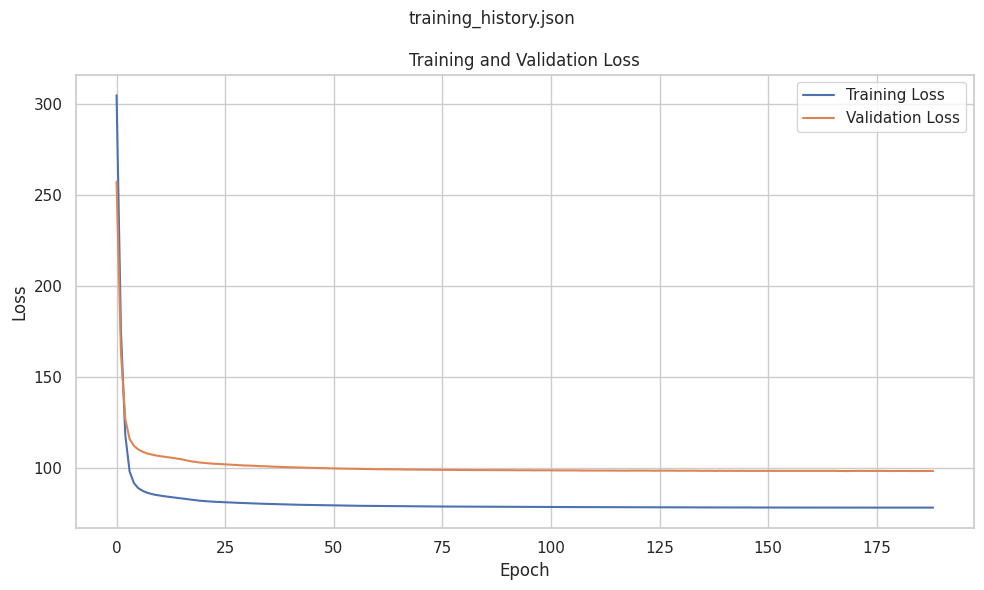

Individual training and validation loss curves saved in /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/Individual_Plots


In [124]:
plot_curves('/content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model')

In [129]:
#Simple_model_VAE_2.save('/content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/model_save_other_save_function/')


AttributeError: 'VAE_v2' object has no attribute 'save'

In [139]:
check_model_trained =VAE_v2(input_dim=500, latent_dim=30, encoder_hidden_dims=[64,128], decoder_hidden_dims=[128,64],dropout_rate=0.2)


# 3. Load the saved state dict
checkpoint = torch.load("/content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Train_Vae_v2/training_files/simple_model/best_model.pth")
check_model_trained.load_state_dict(checkpoint["model_state_dict"])

<All keys matched successfully>

Latent space shape: (7616, 30)
Reconstructed gene expression shape: (7616, 500)


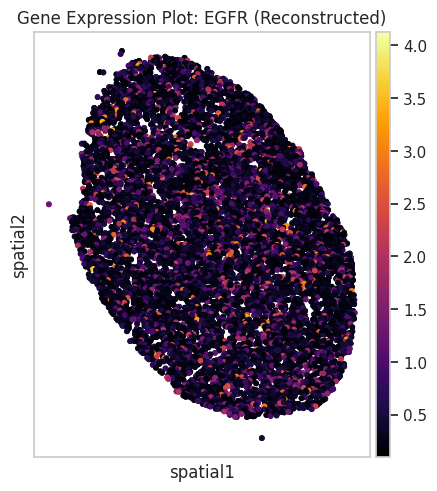

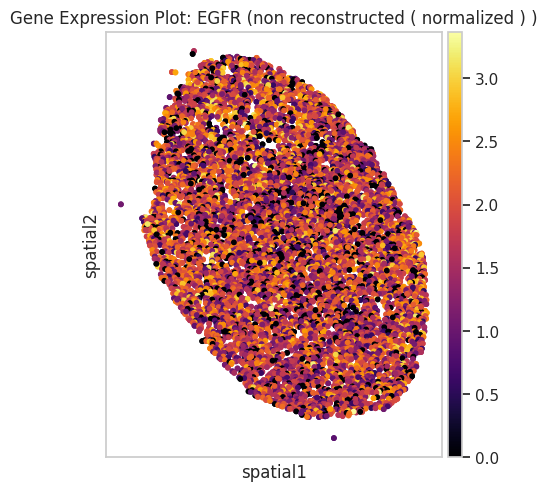

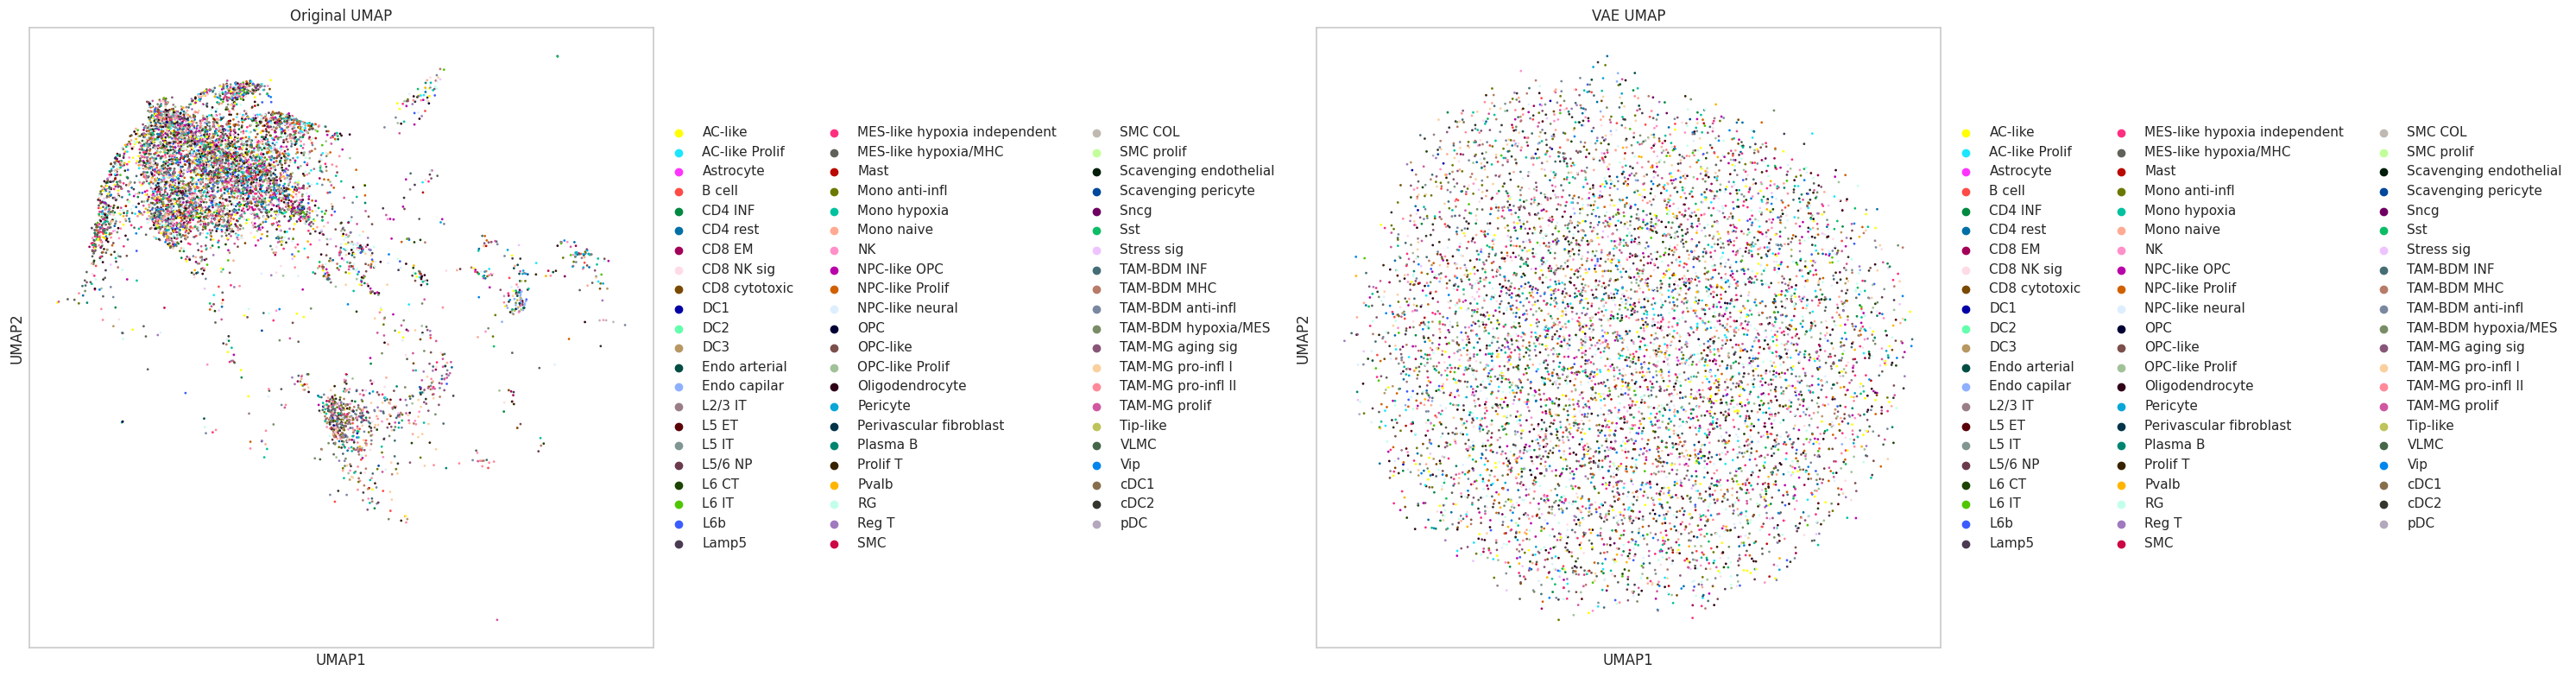

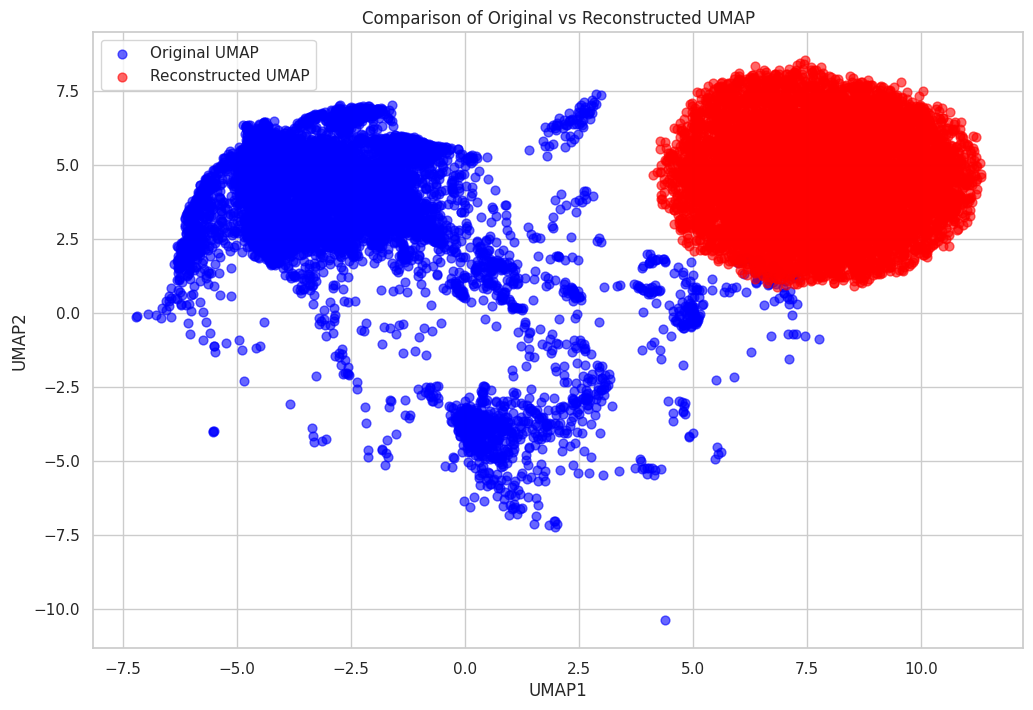


UMAP coordinate correlations:
UMAP1: r=-0.1222 (p=1.0135e-26)
UMAP2: r=-0.3182 (p=9.6778e-179)


In [140]:


original, reconstructed = compare_umap_real_vs_reconstructed(
    trained_model=check_model_trained,
    dataloader=dataloader,
    adata=adata_inference,
    device="cuda"
)